In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import folium
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

---
# **Project Background**

The New York City Taxi and Limousine Commission (TLC) regulates one of the largest, most active transportation systems in the world. With thousands of yellow cabs, green taxis, and for-hire vehicles crisscrossing the city daily, there are hundreds of millions of passenger trips annually, each creating a digital record of trip duration and distance, fare, and payment type. Aggregated data published by the NYC TLC illustrates salient features of transportation trends, economic activities, and mobility in city areas.

New York City is a global business hub, and it attracts many tourists too. Not only for the locals but also for the visiting tourists and traveling employees, taxi services need to be prompt. But at a time when the yellow cabs are getting tough competition from ride-sharing services and considering the task of navigating through the traffic of a heavily populated metropolis, efficiency and revenue optimization in conventional taxi services have gained paramount importance for both the policymakers and taxi operators.

---
# **Problem that need to be answered in this analysis**

This analysis, therefore, attempts to take an approach concerned with maximizing the number of trips by taxis within New York City, which will translate into maximum revenue amongst the drivers and operators. The focus of this project, through the analysis of TLC Trip Record data, is thus to:

- Analyze the pattern and determinants of the number of trips. 
- Understand the relationship between payment types and fare amounts with trip counts and revenues.
- Remove those data inconsistencies, such as negative fare values, which may interfere with appropriate data analysis.
- Give actionable recommendations to drivers and operators on how to maximize their trip counts and revenues with insights such as the best operating hours or hotspots of high demand.

---
# **The method**

The steps applied in this project will include but are not limited to these highlighted below.

1. Data Preprocessing and Cleaning
- Handle missing values 
- Convert date-time fields into an appropriate format and then extract relevant features from the date: hour, weekday, month.
- Handle outliers in trip_distance and fare_amount-for instance, extremely high values for fare_amount.
- Map location IDs to known NYC boroughs/zones for better insights.
2. Exploratory Data Analysis
- Find peak hours, days of the week, and seasonal trends.
- Map hot zones for pickups and drop-offs based on PULocationID and DOLocationID.
- Look at fare vs. trip distance based on Rate Codes.
- Check different usage patterns among different payment methods.
3. Adding Coulmn
- New features to be created are as follows:
-  trip duration : Time difference between dropoff and pickup.
- Trip Speed: The trip distance divided by the trip time .
- Rush Hour: Provides an indicator flag on whether it is rush hours.

4. Statistical Approach
- Testing the hypothesis so that we can understand the correlation between the data

5. Data Visualization

In [218]:
#Put the data into dataframe format called df_raw
df_raw= pd.read_csv('D:/PURWADHIKA/New York City Taxi and Limousine Trip Record/NYC TLC Trip Record.csv',low_memory=False)
display(df_raw.head(),df_raw.tail())


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,NaN,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,NaN,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,NaN,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,NaN,1.0,19.18,NaN,NaN,NaN
68210,2,2023-01-31 23:51:00,2023-02-01 00:07:00,NaN,NaN,256,140,NaN,5.82,23.65,0.0,0.0,2.00,0.0,NaN,1.0,29.40,NaN,NaN,NaN


In [219]:
#copy the df raw into df. later on df data will be the base dataframe to modify/cleaned
df2 = df_raw.copy()
df2.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00


In [220]:
NYC_df = df_raw.copy()
print('Total data: ', len(NYC_df))
NYC_df.head()

Total data:  68211


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00


In [221]:
# Load Dataset Location
location_df= pd.read_csv("D:/PURWADHIKA/taxi_zone_lookup.csv")

In [222]:
location_copy= location_df.copy()

In [223]:
df2= pd.merge(NYC_df, location_copy.add_prefix('PU'), left_on='PULocationID', right_on='PULocationID', how='left')
df2= pd.merge(df2, location_copy.add_prefix('DO'), left_on='DOLocationID', right_on='DOLocationID', how='left')


In [107]:
df= pd.merge(NYC_df, location_copy.add_prefix('PU'), left_on='PULocationID', right_on='PULocationID', how='left')
df= pd.merge(df, location_copy.add_prefix('DO'), left_on='DOLocationID', right_on='DOLocationID', how='left')

print('Total data: ', len(df))
df.head()

Total data:  68211


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,total_amount,payment_type,trip_type,congestion_surcharge,PUBorough,PUZone,PUservice_zone,DOBorough,DOZone,DOservice_zone
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,...,24.18,1.0,1.0,2.75,Manhattan,Morningside Heights,Boro Zone,Manhattan,Lincoln Square West,Yellow Zone
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,...,15.84,1.0,1.0,0.00,Manhattan,Bloomingdale,Yellow Zone,Manhattan,Central Park,Yellow Zone
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,...,11.64,1.0,1.0,0.00,Queens,Steinway,Boro Zone,Queens,Old Astoria,Boro Zone
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,...,10.20,1.0,1.0,0.00,Manhattan,Central Harlem,Boro Zone,Manhattan,Upper West Side North,Yellow Zone
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,...,8.00,1.0,1.0,0.00,Manhattan,Central Harlem,Boro Zone,Manhattan,East Harlem North,Boro Zone



# **Data PreProcessing and Cleaning**

---
**Step 1: Data Understanding:**

In this step, we need to understand the dimension of the data, number of duplicate value, number of null value and the statistic definition of the data for example mean, quantile , etc. 

In [108]:
print(f'Number of row and column in the dataset df are {df.shape}')
df.info()

Number of row and column in the dataset df are (68211, 26)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64


In [109]:
display(df.describe(), df.describe(include='object'))

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,68211.000000,63887.000000,68211.000000,68211.000000,63887.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,0.0,68211.000000,68211.000000,63887.000000,63877.000000,63887.000000
mean,1.863028,1.117160,98.549735,138.429901,1.315870,8.114852,16.603545,0.825431,0.588340,2.139012,0.169627,NaN,0.951625,21.789377,1.373613,1.021933,0.726748
std,0.343820,1.372913,61.244314,76.761311,0.979054,585.105955,13.470121,1.269904,0.385819,3.052710,1.099789,NaN,0.196875,15.457115,0.508039,0.146465,1.212836
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-70.000000,-2.500000,-0.500000,-10.500000,0.000000,NaN,-1.000000,-71.500000,1.000000,1.000000,-2.750000
25%,2.000000,1.000000,74.000000,74.000000,1.000000,1.110000,9.300000,0.000000,0.500000,0.000000,0.000000,NaN,1.000000,12.900000,1.000000,1.000000,0.000000
50%,2.000000,1.000000,75.000000,138.000000,1.000000,1.850000,13.500000,0.000000,0.500000,1.600000,0.000000,NaN,1.000000,17.900000,1.000000,1.000000,0.000000
75%,2.000000,1.000000,129.000000,219.000000,1.000000,3.210000,19.800000,1.000000,0.500000,3.330000,0.000000,NaN,1.000000,26.150000,2.000000,1.000000,2.750000
max,2.000000,99.000000,265.000000,265.000000,9.000000,120098.840000,490.000000,12.500000,2.750000,222.220000,36.050000,NaN,1.000000,491.000000,5.000000,2.000000,2.750000


,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,PUBorough,PUZone,PUservice_zone,DOBorough,DOZone,DOservice_zone
count,68211,68211,63887,68010,68010,68010,67543,67543,67543
unique,66575,66519,2,6,223,4,6,246,4
top,2023-01-09 09:08:00,2023-01-09 00:00:00,N,Manhattan,East Harlem North,Boro Zone,Manhattan,East Harlem South,Boro Zone
freq,4,6,63579,39436,13257,64013,39617,3524,43605


In [110]:
df.isna().sum()/df.shape[0]*100

VendorID                 0.000000  
lpep_pickup_datetime     0.000000  
lpep_dropoff_datetime    0.000000  
store_and_fwd_flag       6.339154  
RatecodeID               6.339154  
PULocationID             0.000000  
DOLocationID             0.000000  
passenger_count          6.339154  
trip_distance            0.000000  
fare_amount              0.000000  
extra                    0.000000  
mta_tax                  0.000000  
tip_amount               0.000000  
tolls_amount             0.000000  
ehail_fee                100.000000
improvement_surcharge    0.000000  
total_amount             0.000000  
payment_type             6.339154  
trip_type                6.353814  
congestion_surcharge     6.339154  
PUBorough                0.294674  
PUZone                   0.294674  
PUservice_zone           0.294674  
DOBorough                0.979314  
DOZone                   0.979314  
DOservice_zone           0.979314  
dtype: float64

In [111]:
df.isna().sum()


VendorID                 0    
lpep_pickup_datetime     0    
lpep_dropoff_datetime    0    
store_and_fwd_flag       4324 
RatecodeID               4324 
PULocationID             0    
DOLocationID             0    
passenger_count          4324 
trip_distance            0    
fare_amount              0    
extra                    0    
mta_tax                  0    
tip_amount               0    
tolls_amount             0    
ehail_fee                68211
improvement_surcharge    0    
total_amount             0    
payment_type             4324 
trip_type                4334 
congestion_surcharge     4324 
PUBorough                201  
PUZone                   201  
PUservice_zone           201  
DOBorough                668  
DOZone                   668  
DOservice_zone           668  
dtype: int64

In [112]:
# find unique data for every column to understand better the data

pd.set_option('display.max_colwidth', 1)

listItem = []
for col in df.columns : listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,VendorID,2,"[2, 1]"
1,lpep_pickup_datetime,66575,"[2023-01-01 00:26:10, 2023-01-01 00:51:03, 2023-01-01 00:35:12, 2023-01-01 00:13:14, 2023-01-01 00:33:04, 2023-01-01 00:53:31, 2023-01-01 00:09:14, 2023-01-01 00:11:58, 2023-01-01 00:41:29, 2023-01-01 00:50:32, 2023-01-01 00:16:12, 2023-01-01 00:08:43, 2023-01-01 00:26:32, 2023-01-01 00:18:35, 2023-01-01 00:39:32, 2023-01-01 00:49:34, 2023-01-01 00:10:45, 2023-01-01 00:35:11, 2023-01-01 00:31:06, 2023-01-01 00:14:37, 2023-01-01 00:26:21, 2023-01-01 00:41:56, 2023-01-01 00:32:02, 2023-01-01 00:55:13, 2023-01-01 00:01:31, 2023-01-01 00:22:31, 2023-01-01 00:57:28, 2023-01-01 00:35:21, 2023-01-01 00:52:52, 2023-01-01 00:32:56, 2023-01-01 00:24:01, 2023-01-01 00:46:48, 2023-01-01 00:40:58, 2023-01-01 00:20:23, 2023-01-01 01:49:24, 2023-01-01 00:41:53, 2023-01-01 00:56:26, 2023-01-01 00:33:10, 2023-01-01 00:58:28, 2023-01-01 00:42:49, 2023-01-01 00:48:21, 2023-01-01 00:08:05, 2023-01-01 00:13:47, 2023-01-01 00:16:10, 2023-01-01 00:04:25, 2023-01-01 00:33:38, 2023-01-01 00:46:08, 2023-01-01 01:00:08, 2023-01-01 00:28:04, 2023-01-01 00:23:04, 2023-01-01 00:34:07, 2023-01-01 00:52:03, 2023-01-01 00:25:31, 2023-01-01 00:53:09, 2023-01-01 00:42:37, 2023-01-01 00:39:52, 2023-01-01 00:15:32, 2023-01-01 00:06:48, 2023-01-01 00:57:15, 2023-01-01 00:14:13, 2023-01-01 00:52:48, 2023-01-01 00:34:13, 2023-01-01 00:44:41, 2023-01-01 00:11:12, 2023-01-01 01:44:43, 2023-01-01 01:04:44, 2023-01-01 01:48:11, 2023-01-01 01:11:39, 2023-01-01 01:54:25, 2023-01-01 01:59:10, 2023-01-01 01:22:35, 2023-01-01 01:37:10, 2023-01-01 01:46:22, 2023-01-01 01:59:48, 2023-01-01 01:09:49, 2023-01-01 01:23:35, 2023-01-01 01:53:20, 2023-01-01 01:32:14, 2023-01-01 01:01:05, 2023-01-01 01:34:41, 2023-01-01 01:52:08, 2023-01-01 01:49:28, 2023-01-01 01:03:59, 2023-01-01 01:13:11, 2023-01-01 01:40:06, 2023-01-01 01:33:50, 2023-01-01 01:45:19, 2023-01-01 01:51:29, 2023-01-01 01:34:07, 2023-01-01 01:10:08, 2023-01-01 01:32:17, 2023-01-01 01:48:28, 2023-01-01 01:30:43, 2023-01-01 01:51:10, 2023-01-01 01:09:36, 2023-01-01 01:19:54, 2023-01-01 01:31:10, 2023-01-01 01:42:30, 2023-01-01 00:57:51, 2023-01-01 01:27:36, ...]"
2,lpep_dropoff_datetime,66519,"[2023-01-01 00:37:11, 2023-01-01 00:57:49, 2023-01-01 00:41:32, 2023-01-01 00:19:03, 2023-01-01 00:39:02, 2023-01-01 01:11:04, 2023-01-01 00:26:39, 2023-01-01 00:24:55, 2023-01-01 00:46:26, 2023-01-01 01:13:42, 2023-01-01 00:41:43, 2023-01-01 00:17:08, 2023-01-01 00:45:31, 2023-01-01 00:30:09, 2023-01-01 01:18:06, 2023-01-01 01:08:23, 2023-01-01 00:19:37, 2023-01-01 01:17:35, 2023-01-01 00:42:23, 2023-01-01 00:21:50, 2023-01-01 00:30:26, 2023-01-01 00:46:06, 2023-01-01 00:41:25, 2023-01-01 00:59:47, 2023-01-01 00:16:02, 2023-01-01 00:39:24, 2023-01-01 01:09:31, 2023-01-01 00:53:49, 2023-01-01 01:00:53, 2023-01-01 00:42:53, 2023-01-01 00:32:05, 2023-01-01 01:08:17, 2023-01-01 01:04:32, 2023-01-01 00:24:32, 2023-01-01 01:57:51, 2023-01-01 00:41:58, 2023-01-01 01:14:41, 2023-01-01 00:43:08, 2023-01-01 01:14:46, 2023-01-01 00:51:53, 2023-01-01 01:23:50, 2023-01-01 00:13:26, 2023-01-01 00:25:57, 2023-01-01 00:54:55, 2023-01-01 00:17:50, 2023-01-01 00:38:51, 2023-01-01 00:59:10, 2023-01-01 01:05:46, 2023-01-01 00:43:45, 2023-01-01 23:18:32, 2023-01-01 00:50:01, 2023-01-01 00:57:56, 2023-01-01 00:38:40, 2023-01-01 01:13:35, 2023-01-01 00:47:15, 2023-01-01 00:48:54, 2023-01-01 00:23:03, 2023-01-01 01:08:47, 2023-01-01 01:00:15, 2023-01-01 00:25:43, 2023-01-01 01:21:19, 2023-01-01 00:43:57, 2023-01-01 00:48:26, 2023-01-01 00:38:12, 2023-01-01 01:57:31, 2023-01-01 01:11:23, 2023-01-01 02:05:51, 2023-01-01 01:41:21, 2023-01-01 02:05:19, 2023-01-01 02:11:36, 2023-01-01 01:25:11, 2023-01-01 01:41:30, 2023-01-01 02:04:14, 2023-01-01 02:05:29, 2023-01-01 01:17:55, 2023-01-01 01:53:43, 2023-01-01 02:27:01, 2023-01-01 01:43:55, 2023-01-01 01:13:02, 2023-01-01 02:00:06, 2023-01-01 02:00:57, 2023-01-01 02:13:18, 2023-01-01 01:07:17, 2023-01-01 01:26:01, 2

In [113]:
# checking the duplicate of the data
duplicateRows = df[df.duplicated()]
print(duplicateRows)

Empty DataFrame
Columns: [VendorID, lpep_pickup_datetime, lpep_dropoff_datetime, store_and_fwd_flag, RatecodeID, PULocationID, DOLocationID, passenger_count, trip_distance, fare_amount, extra, mta_tax, tip_amount, tolls_amount, ehail_fee, improvement_surcharge, total_amount, payment_type, trip_type, congestion_surcharge, PUBorough, PUZone, PUservice_zone, DOBorough, DOZone, DOservice_zone]
Index: []

[0 rows x 26 columns]



**Step 1: Data Understanding - Result**

1. Number of row and column in the dataset df are (68211, 20)
2. ehail_fee column has all null value. This column will be dropped because there's no such a pattern that need to be investigated further

3. There are nan value in some of the column with percentage missing data as follow
<br>
    - store_and_fwd_flag 6.339154 %
    - RatecodeID 6.339154 %
    - passenger_count            6.339154  %
    - payment_type               6.339154 %
    - trip_type                  6.353814 %
    - congestion_surcharge       6.339154 %
    <br>
    These data needs to be further investigated so that the treament of this nan value can be decided. The investigation including pattern investigation

4. There are some unappropriate deffinition of data types. Here are 3 data types that  needs to be  adjusted in order 
    - lpep_pickup_datetime and lpep_dropoff_datetime:
        <br>
        Current Type: object (possibly string), Expected Type: datetime
        This data will be converted into  datetime format, because they represent date and time information. This conversion will support other further anlysis such as  calculating trip duration, filtering by specific time ranges, and other time-related analyses.

    - store_and_fwd_flag:
        <br>
        Current Type: object (posibly string with values like "Y" and "N")
        Expected Type: category (or a binary int or bool)
        This data will be converted into a category so that will reduce memory usage, and it allows for efficient filtering.

5.  Found negative value on Improvement_surcharge. Improvement surcharge is basically a fixed addition-almost always $0.30-per-trip charge to help pay for improvements and infrastructure. It's added on top of the fare and does not change based on distance or time of the trip.It is not logicall when it has negative values in this column, it may indicate Data Entry Errors or Data Processing Problems where there could be an error in importing or processing data, especially where some computation or offset would have applied. This data should be handled later.

6. Found negative value on mta_tax: mta_tax is a constant item that is added on each taxi fare in New York City and the money from which is used to benefit Metropolitan Transportation Authority. It should be positive or zero since it is an addition to fare. The negative value probably caused by an error in data entry or processing, such as improper adjustment or transformation of data. The pattern of this data needs to be observed later

7. Found negative value on extra: There is no definition of extra on PDF docs. On many cases, The extra field to indicates more surcharges such as rush hour fees or overnight charges. Similar to the mta_tax, these are the costs that come on top of the fare due to particular conditions-peak hours in this case-and would always be positive or zero but not negative. The pattern of this data needs to be observed later

8. Found negative value on congestion_surcharge: There is no definition of extracongestion_surcharg on PDF docs. 

9. There is different category that can be found on RatecodeId. On the data definition, the RatecodeID defined as follow : 
<br> 
    1=Standardrate; 2=JFK; 3=Newark; 4=Nassau or Westchester; 5=Negotiated fare; 6=Group ride
<br><br>
    In reality, however, RatecodeID for the real data contains the following values: [1.0, 5.0, 4.0, 3.0, 2.0, 99.0, nan]. Notably, the value 99.0 seems a bit misplaced while considering the categories defined earlier, as this should be 6 for group rides; in this case, further investigation might be needed.

10. There is no duplicated row on the data

11. The data can be group to numerical data and categorical data which will impact how the data will be treated later. Based on the characteristic the data devided as follow :
<br>
    - Numerical data: passenger_count, trip_distance, fare_amount, extra, mta_tax, improvement_surcharge, tip_amount, tolls_amount, total_amount, congestion surcharge
    - Categorical: VendorID, lpep_pickup_datetime, lpep_dropoff_datetime, PULocationID, DOLocationID, RatecodeID, store_and_fwd_flag, payment_type, trip_type

---

---
**Step 2: Missing Values and outliers**
<br>
In this step, the pattern of the missing values and outliers are observed and the treatment of each missing values is decided

<Axes: >

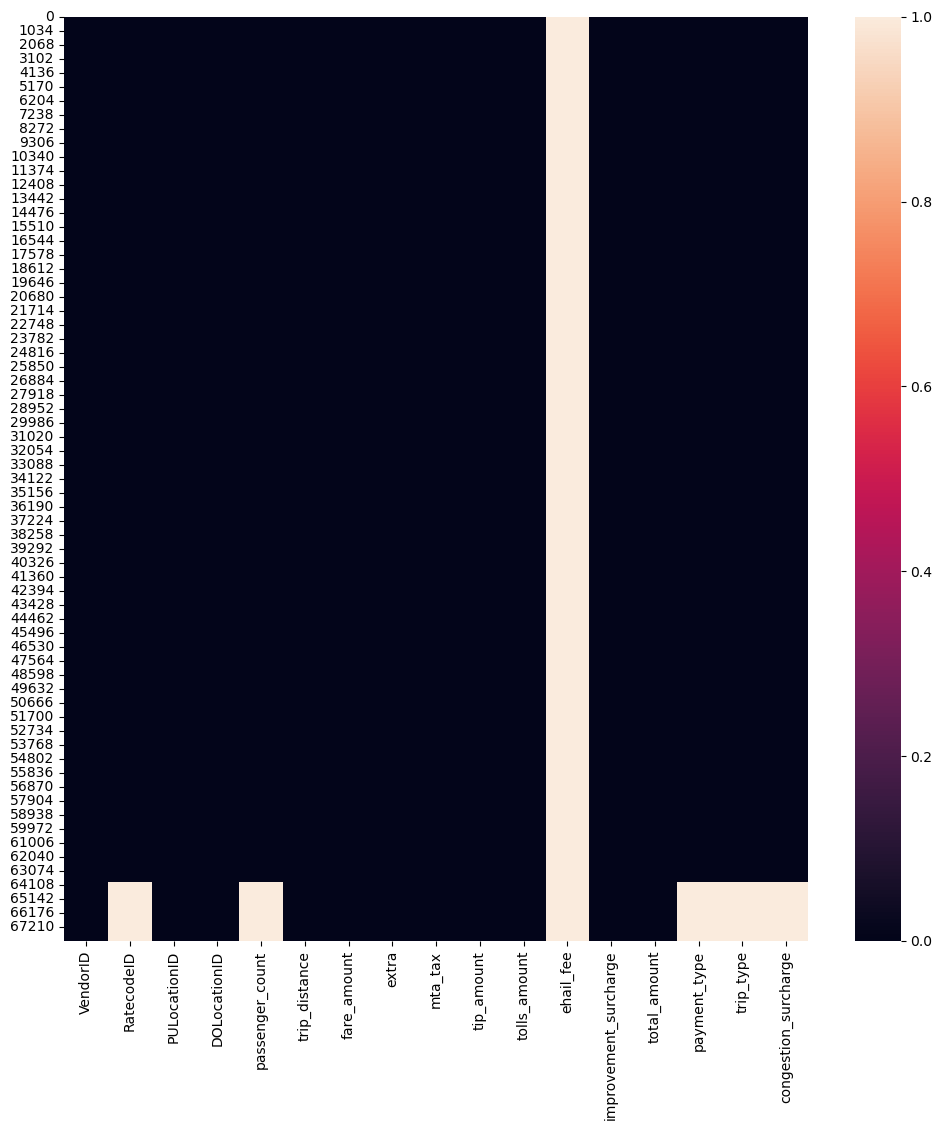

In [114]:
#plot the data to understand the distribution of the missing data
plt.figure(figsize=(12,12))
sns.heatmap(df[['VendorID','RatecodeID','PULocationID','DOLocationID','passenger_count','trip_distance','fare_amount','extra','mta_tax','tip_amount','tolls_amount','ehail_fee','improvement_surcharge','total_amount','payment_type','trip_type','congestion_surcharge']].isna())

The plot above showing that the missing value of the data concetrated at lowest row of the data. 
<br>
The other pattern of the missing value will be deeper investigated such as : are these missing value corralated to certain vendor , ratecodeid etc
<br>


---
**2.1: ehail_fee**
<br>
Drop the column of ehail_fee and observe the dimension of the data after 

In [115]:
#code to drop the data
df = df.drop(columns=['ehail_fee'])
#print the information of dataframe after dropping the data
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14  improvement_surcharge  68211 non-null  float64
 15  to

The ehail fee column has been dropped

---


---
**2.2 Identify outliers on numerical data**
<br>
To identify the outliers, create boxplots for numerical features, which helps in visualizing the spread and identifying outliers. the boxplot will visualized trip_distance, fare_amount, tip_amount, total_amount, and trip_duration.

To better understand the data the modification of data type lpep_pickup_datetime and lpep_dropoff_datetime are needed so that this data will give better information such as date and times.

In [116]:
#convert the data types to date and time types
df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'])
df['lpep_dropoff_datetime'] = pd.to_datetime(df['lpep_dropoff_datetime'])

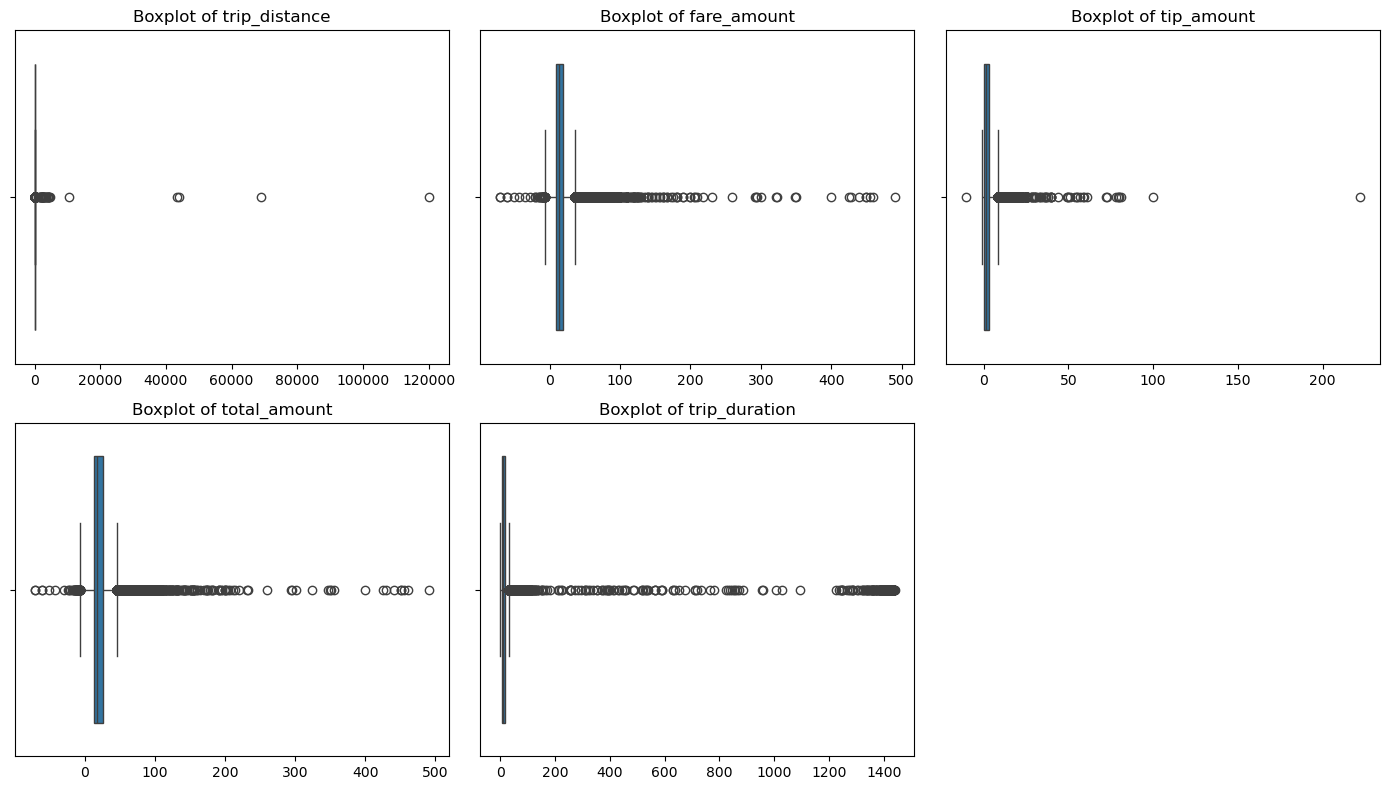

In [117]:
# Calculate trip duration in minutes
df['trip_duration'] = (df['lpep_dropoff_datetime'] - df['lpep_pickup_datetime']).dt.total_seconds() / 60

# Select relevant columns for outlier detection
features = ['trip_distance', 'fare_amount', 'tip_amount', 'total_amount', 'trip_duration']

# Set up the plotting area
plt.figure(figsize=(14, 8))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.xlabel('')

plt.tight_layout()
plt.show()


Based on the boxplot above, there are some statements that can be explained : 
1. Negative Values in fare_amount and total_amount
    - Both fare_amount and total_amount have negative values, which are visible as outliers in the boxplot display. Logically, fares and total charges should always be non-negative, hence these values are discrepancies in the data.
    - The reasons why these values are negative can't be found out without deeper analysis of some other variables, including: improvement_surcharge, mta_tax, extra, congestion_surcharge
    - Determine if this abnormal negative readings are a result of infrequent adjustments or incorrect entries in other variable. If under certain conditions, the totals are consistently negative, then those records may require special processing or be edited to conform to what is expected.
2. High Values in trip_distance
    - Some of the values of trip_distance are outrageously high. The distances go way beyond what you would normally have for a taxi travel in an urban environment.
    - The Distances that too high for an urban area, might be indication of input errors 
    - How to proceed with these cases: Filtering and analyzing these cases further for patterns or possible mistakes; Verify if these abnormal distances make sense concerning the PULocationID and DOLocationID-in other words, if they can be realistically done in an actual travel scenario.
3. Negative Values in tip_amount
    - There exist negative values in the variable tip_amount. Logically, this is inconsistent because the tip amount always has to be positive or zero.
    - These negative tips could be because of issues in data recording,since the tips for credit card payments are recorded automatically.
    - Later , need to check whether negative tips correspond vendors, or conditions that would suggest data anomalies.
4. Very High trip_distance Values Over 20,000 Miles
    - The boxplot shows some trips with distances over 20,000 miles which is almost imposible  for a single taxi ride.
    - These are almost certainly errors in data, perhaps due to improper units, misplaced decimal places, or malfunctioning GPS tracking.
    - Verify these records by comparing lpep_pickup_datetime, lpep_dropoff_datetime, and location data for further validity. Consider removing or correcting these outliers for realistic analysis.
5. Discrepancy Between trip_duration and trip_distance
    - The boxplot for trip_duration shows very high values for some trips, which may imply duration that does not logically correspond to the recorded trip_distance. It means large discrepancies between duration and distance can point to data issues such as those dealing with GPS or timestamp errors, or places where the taxi stays in one position longer than usual, like heavy flow or stops.
    - Manually check the cases for trip_duration and trip_distance to see if some records need correction. Also, calculate the average speed for those trips, as unrealistic speed or distances also suggest errors in data.
6. Possitive Tip_amount not count as ouliers
    - By nature, tips are a reflection of the customer's satisfaction with the service provided by the driver. On this basis, the amount which a customer decides to tip is highly subjective and may vary in different trips.
    - Positive tips are indicative of good service or appreciation by the customer, and it is based on a variety of factors including ride quality, driver behavior, and customer preference.

**2.2.1 Identify negative value on fare_amount and total_amount**
<br>
There are possibilities that the negative_value at fare_amount and total_amount is impacted by the negative value of other datas for example the negative value of tip_amount. So in this step the distribution and the number of the negative value of other data will be observed

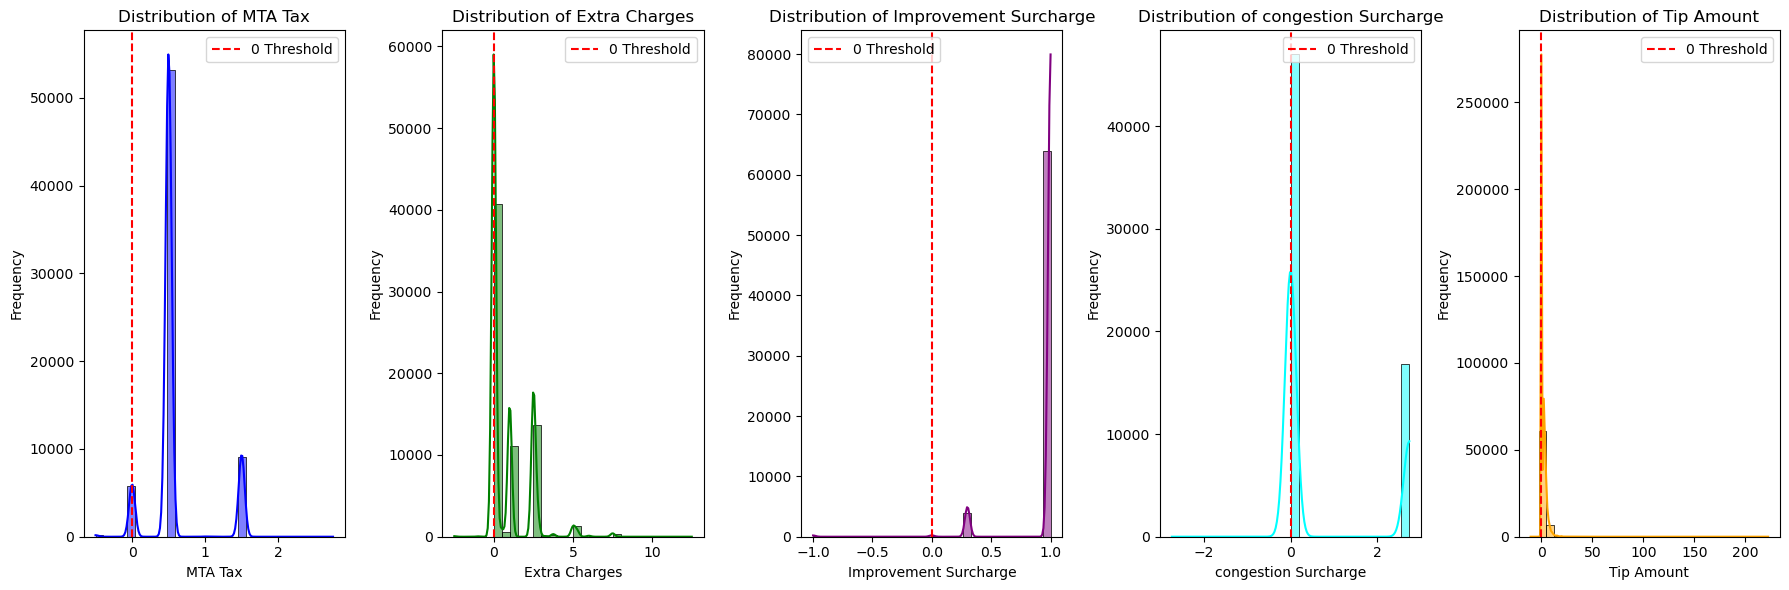

In [118]:
# Set up the plotting area
plt.figure(figsize=(18, 6))

# Plot for mta_tax
plt.subplot(1, 5, 1)
sns.histplot(df['mta_tax'], bins=30, kde=True, color='blue')
plt.axvline(0, color='red', linestyle='--', label='0 Threshold')
plt.title("Distribution of MTA Tax")
plt.xlabel("MTA Tax")
plt.ylabel("Frequency")
plt.legend()

# Plot for extra
plt.subplot(1, 5, 2)
sns.histplot(df['extra'], bins=30, kde=True, color='green')
plt.axvline(0, color='red', linestyle='--', label='0 Threshold')
plt.title("Distribution of Extra Charges")
plt.xlabel("Extra Charges")
plt.ylabel("Frequency")
plt.legend()

# Plot for Improvement_surcharge
plt.subplot(1, 5, 3)
sns.histplot(df['improvement_surcharge'], bins=30, kde=True, color='purple')
plt.axvline(0, color='red', linestyle='--', label='0 Threshold')
plt.title("Distribution of Improvement Surcharge")
plt.xlabel("Improvement Surcharge")
plt.ylabel("Frequency")
plt.legend()

plt.subplot(1, 5, 4)
sns.histplot(df['congestion_surcharge'], bins=30, kde=True, color='cyan')
plt.axvline(0, color='red', linestyle='--', label='0 Threshold')
plt.title("Distribution of congestion Surcharge")
plt.xlabel("congestion Surcharge")
plt.ylabel("Frequency")
plt.legend()

plt.subplot(1, 5, 5)
sns.histplot(df['tip_amount'], bins=30, kde=True, color='orange')
plt.axvline(0, color='red', linestyle='--', label='0 Threshold')
plt.title("Distribution of Tip Amount")
plt.xlabel("Tip Amount")
plt.ylabel("Frequency")
plt.legend()


# Display the plots
plt.tight_layout()
plt.show()


Based on the distribution graph above there are some small amount of negative value on those data. But the result of negative value later on will impact the revenue. so that, this negative value need to be understood and treated

In [119]:
# Identify negative values in the specified columns
negative_improvement_surcharge = df[df['improvement_surcharge'] < 0]
negative_mta_tax = df[df['mta_tax'] < 0]
negative_extra = df[df['extra'] < 0]
negative_congestion_surcharge = df[df['congestion_surcharge'] < 0]
negative_tip_amount = df[df['tip_amount'] < 0]

negative_fare = df[df['fare_amount'] < 0]
negative_total = df[df['total_amount'] < 0]


# Print the counts of negative values
print(f"Negative Fare amount Count: {negative_fare.shape[0]}")
print(f"Negative Total Amount Count: {negative_total.shape[0]}")
print(f"Negative Improvement Surcharge Count: {negative_improvement_surcharge.shape[0]}")
print(f"Negative MTA Tax Count: {negative_mta_tax.shape[0]}")
print(f"Negative Extra Count: {negative_extra.shape[0]}")
print(f"Negative Congestion Surchage: {negative_congestion_surcharge.shape[0]}")
print(f"Negative Tip amount: {negative_tip_amount.shape[0]}")

#print("Negative Improvement Surcharge Examples:\n", negative_improvement_surcharge.head())
#print("Negative MTA Tax Examples:\n", negative_mta_tax.head())
#print("Negative Extra Examples:\n", negative_extra.head())
#print("Negative Congestion Surchage:\n", negative_congestion_surcharge.head())

Negative Fare amount Count: 176
Negative Total Amount Count: 179
Negative Improvement Surcharge Count: 174
Negative MTA Tax Count: 165
Negative Extra Count: 80
Negative Congestion Surchage: 3
Negative Tip amount: 9


In [120]:
# Check for negative values in improvement_surcharge, mta_tax, extra, and congestion_surcharge
surcharge_columns = ['fare_amount','improvement_surcharge', 'mta_tax', 'extra', 'congestion_surcharge','tip_amount']

# negative fare_amount records
#print("Proportion of negative values in surcharges for negative fare_amount:")
#for column in surcharge_columns:
#    proportion_neg_fare = (negative_fare[column] < 0).mean() * 100
#    print(f"{column}: {proportion_neg_fare:.2f}%")

# proportion negative total_amount records. percentage calculation de 
print("\nProportion of negative values in surcharges for negative total_amount:")
for column in surcharge_columns:
    proportion_neg_total = (negative_total[column] < 0).mean() * 100
    print(f"{column}: {proportion_neg_total:.2f}%")


print("\n--------------------------------------------------------------------")
#in this code , check the location of negative value of each column relatively to th total_amount negative value
# the the percentage of negative_value for each column will be calculated relatively to total negative value on the column itself
for column in surcharge_columns:
    # Calculate the proportion relative to the total negative values in the surcharge column itself
    total_neg_in_column = (df[column] < 0).sum()
    proportion_neg_total = (negative_total[column] < 0).sum() / total_neg_in_column * 100 if total_neg_in_column > 0 else 0
    print(f"{column}: {proportion_neg_total:.2f}%")



Proportion of negative values in surcharges for negative total_amount:
fare_amount: 98.32%
improvement_surcharge: 97.21%
mta_tax: 92.18%
extra: 44.69%
congestion_surcharge: 1.68%
tip_amount: 5.03%

--------------------------------------------------------------------
fare_amount: 100.00%
improvement_surcharge: 100.00%
mta_tax: 100.00%
extra: 100.00%
congestion_surcharge: 100.00%
tip_amount: 100.00%


The pattern of negative values of some of the variable has been observed. Based on the result of the observation it has been found that all negative value in fare_amount, improvement_surcharge,mta_tax, extra, congestion_surcharge, tip_amount are located on the same row of negative total_amount. 
<br>
The next step after knowing the pattern is check whether this pattern is impacted by certain type of payment type or certain vendor ID. Also check the pattern on data store_and_fwd_flag

In [121]:
#check payment distribution
payment_type_distribution = negative_total['payment_type'].value_counts(normalize=True) * 100

print("Percentage distribution of Payment_type for records with negative total_amount:")
print(payment_type_distribution)

#check if dispute and no charge
no_charge_or_dispute = payment_type_distribution.loc[[3, 4]] if 3 in payment_type_distribution.index and 4 in payment_type_distribution.index else None

if no_charge_or_dispute is not None:
    total_percentage = no_charge_or_dispute.sum()
    print(f"\nTotal percentage of 'No charge' and 'Dispute' Payment_type: {total_percentage:.2f}%")
else:
    print("\n'No charge' and 'Dispute' Payment_type records are not present.")

Percentage distribution of Payment_type for records with negative total_amount:
payment_type
3.0    79.885057
4.0    18.390805
2.0    1.724138 
Name: proportion, dtype: float64

Total percentage of 'No charge' and 'Dispute' Payment_type: 98.28%


Since nearly all the negative records amount to 98.28% of total_amount for "No charge" or "Dispute," this level of entry is likely intentional for recording trips that were not billed, "No charge," or are under dispute, "Dispute."

The high percentage of the data gives an indication of the fact that the negative values in this context is intentional. This will reduce the need for cleaning the data with regard to setting such values at zero or removing them, since the data might represent real situations where the fares were disputes or challenged.

So in this case, the value will keep  as is, give flagging and not correct them. Later on the data won't be calculated on revenue related calculation or visualization

In [122]:
# Check the distribution of VendorID for records with negative total_amount
vendor_distribution = negative_total['VendorID'].value_counts(normalize=True) * 100
print("Percentage distribution of VendorID for records with negative total_amount:")
print(vendor_distribution)

# Check the distribution of store_and_fwd_flag for records with negative total_amount
store_and_fwd_distribution = negative_total['store_and_fwd_flag'].value_counts(normalize=True) * 100
print("\nPercentage distribution of store_and_fwd_flag for records with negative total_amount:")
print(store_and_fwd_distribution)

Percentage distribution of VendorID for records with negative total_amount:
VendorID
2    100.0
Name: proportion, dtype: float64

Percentage distribution of store_and_fwd_flag for records with negative total_amount:
store_and_fwd_flag
N    100.0
Name: proportion, dtype: float64


-  all the negative total_amount entries are related to VendorID 2, this may mean that the negative values are an attribute specific to transactions handled by this particular vendor.
This may be the result of Vendor 2 handling refunds differently, voided trips, or disputes, or possibly some quirky way in which Vendor 2 processes and books transactions with no charges or contested fares.
- The fact that all records with a negative total_amount were dispatched in real time-store_and_fwd_flag = 'N'-implies that these records were sent immediately after the trip and as such weren't held in memory for transmission later on. This would indicate that the negative values do not, in fact, reflect delayed or batch processing of the data but instead characterize the instantaneous status at the point in time of such transactions when it is being processed, possibly due to some special business rules regarding immediate billing adjustments by Vendor 2.
- To decide whether this negative will be ignored or not on the calculation it is better to consult with the domain expert, meanwhile flagging the data will be done until there is some discussion with the domain expert

In [123]:
#handling the negative values by flagging the values in the column

# Add a new column 'is_negative_total' to flag records with negative total_amount
df['is_negative_total'] = df['total_amount'] < 0

# View flagged records i
negative_records = df[df['is_negative_total']]
print("Flagged records with negative total_amount:")
print(negative_records[['total_amount', 'payment_type', 'VendorID', 'store_and_fwd_flag']].head())


Flagged records with negative total_amount:
      total_amount  payment_type  VendorID store_and_fwd_flag
662  -4.5           3.0           2         N                
898  -4.5           4.0           2         N                
1317 -11.1          3.0           2         N                
1686 -5.3           4.0           2         N                
1864 -5.2           3.0           2         N                


The new column has been added to the dataframe as flagging to the negative total amount

---

---
**2.2.2 Outliers in trip distance and trip duration**
<br>
The method that will be used to remove the outliers in the data will be using the IQR. But it must be noted that
1. Based on the TCL policy  https://www.nyc.gov/site/tlc/about/fatigued-driving-prevention-frequently-asked-questions.page , Maximum driving hours for the driver is 10 hours within 24 hours. TLC will count the time when a driver has a passenger in the vehicle ("passenger time"). Drivers will be limited to 10 hours of passenger time in a 24-hour period. So trip duration more than 10 hours continiously may be counted as outliers.
2. for the trip distance there might be unique route with long distance where the data will condidered as an outliers by the formula but actually is not an outliers

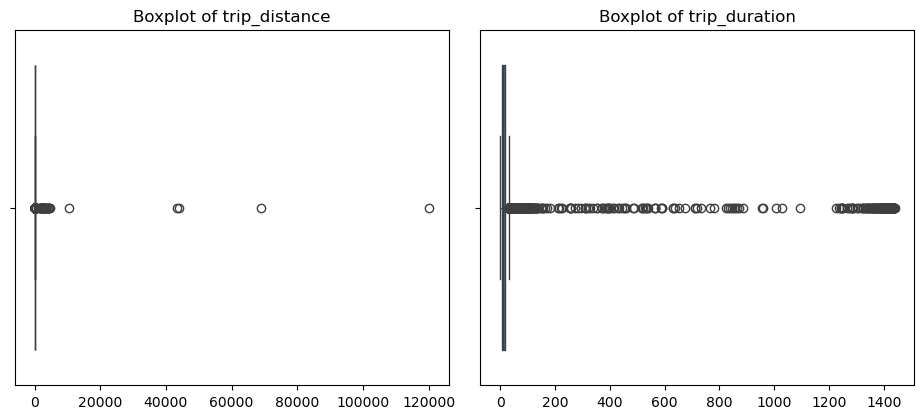

In [200]:
# Select relevant columns for outlier detection
features2 = ['trip_distance','trip_duration']

# Set up the plotting area
plt.figure(figsize=(14, 8))
for i, feature in enumerate(features2, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.xlabel('')

plt.tight_layout()
plt.show()

In [124]:
# Calculate Q1 and Q3
Q1 = df['trip_distance'].quantile(0.25)
Q3 = df['trip_distance'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Flag outliers
df['outliers_trip'] = (df['trip_distance'] < lower_bound) | (df['trip_distance'] > upper_bound)
outliers = df[(df['trip_distance'] < lower_bound) | (df['trip_distance'] > upper_bound)]
print(f"Number of outliers in trip distance: {len(outliers)}")
print(f"Lower bound trip distance: {(lower_bound)}")
print(f"Upper bounds in trip distance: {(upper_bound)}")

Number of outliers in trip distance: 5774
Lower bound trip distance: -2.039999999999999
Upper bounds in trip distance: 6.359999999999999


In [125]:
# Group by PULocationID and DOLocationID and calculate total trips and outliers
summary = (
    df.groupby(['PULocationID', 'DOLocationID'])
    .agg(
        Total_Trips=('trip_distance', 'size'),
        Total_Outliers=('outliers_trip', 'sum')
    )
    .reset_index()
)

# Create a route column for better representation
summary['Route'] = summary['PULocationID'].astype(str) + ' → ' + summary['DOLocationID'].astype(str)

# Step 3: Display the summary table
print(summary[['Route', 'Total_Trips', 'Total_Outliers']])

          Route  Total_Trips  Total_Outliers
0     1 → 264    1            0             
1     3 → 3      1            0             
2     3 → 32     1            0             
3     3 → 51     1            0             
4     3 → 74     1            1             
...      ...    ..           ..             
5923  265 → 237  1            0             
5924  265 → 248  1            1             
5925  265 → 251  1            0             
5926  265 → 264  5            1             
5927  265 → 265  21           2             

[5928 rows x 3 columns]


In [126]:
# Find pairs where Total Trips is equal to Total Outliers
same_trips_and_outliers = summary[summary['Total_Trips'] == summary['Total_Outliers']]

# Display the results
print(same_trips_and_outliers[['Route', 'Total_Trips', 'Total_Outliers']])
print(same_trips_and_outliers.head())

          Route  Total_Trips  Total_Outliers
4     3 → 74     1            1             
6     3 → 243    1            1             
12    7 → 13     1            1             
13    7 → 14     2            2             
15    7 → 20     1            1             
...      ...    ..           ..             
5915  265 → 82   2            2             
5916  265 → 92   7            7             
5917  265 → 117  1            1             
5918  265 → 122  1            1             
5924  265 → 248  1            1             

[1792 rows x 3 columns]
    PULocationID  DOLocationID  Total_Trips  Total_Outliers    Route
4   3             74            1            1               3 → 74 
6   3             243           1            1               3 → 243
12  7             13            1            1               7 → 13 
13  7             14            2            2               7 → 14 
15  7             20            1            1               7 → 20 


In [127]:
# Sum the number of outliers
total_outliers_count = same_trips_and_outliers['Total_Outliers'].sum()

# Print the total number of outliers
print(f"Total number of outliers for pairs with equal trips and outliers: {total_outliers_count}")

Total number of outliers for pairs with equal trips and outliers: 3487


In our analysis of the trip distances using the IQR approach, we see 5,774 records as outliers in total. This is all trip distances that fall outside the set thresholds using the computation of the IQR.

However, consider that 3,487 of these outlier records represent unique routes-that are combinations of PULocationID and DOLocationID. These are routes that have been singled out for having trip distances that were considered as outliers according to the formula for the IQR.

What it means, in other words, is that even though these 3,487 records of outliers are statistically valid records, they should not be counted in our outlier counts because we also have to count general performance or patterns for regular routes. This is so because the unique routes could be representing uncommon trips that fail to represent the standard operating patterns observed in the greater part of the trips.

Therefore, in this context, we can conclude that:

The total number of 5,774 outlier trips are extreme values in the dataset using the IQR method.
The 3,487 unique route records that show up as outliers might not be treated as outliers for the analysis of common trip patterns since they could by nature skew the analysis because their nature is already unique.
This distinction is important and helps us remain focused on typical trip behaviors that provide more useful insights for the distances of the majority of routes.

After we identifed which data are the real outliers, we need to update the flag of outliers in the column 'outliers_trip'

In [128]:
# identified the unique route that previously identified as ouliers
unique_routes = same_trips_and_outliers[['PULocationID', 'DOLocationID']]

In [129]:
unique_routes.count()
unique_routes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1792 entries, 4 to 5924
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   PULocationID  1792 non-null   int64
 1   DOLocationID  1792 non-null   int64
dtypes: int64(2)
memory usage: 42.0 KB


In [130]:

unique_route_set = set(unique_routes.itertuples(index=False, name=None))

# Update 'outliers_trip' flag to False for rows that match these unique routes
df['outliers_trip'] = df.apply(
    lambda row: False if (row['PULocationID'], row['DOLocationID']) in unique_route_set else row['outliers_trip'],
    axis=1
)

# Confirm the update by checking the count of remaining outliers
remaining_outliers = df['outliers_trip'].sum()
print(f"Remaining outliers after excluding unique routes: {remaining_outliers}")


Remaining outliers after excluding unique routes: 2287


In [131]:
# Count the number of True and False values in the 'outliers_trip' column
outliers_count = df['outliers_trip'].value_counts()

# Print the count of True and False values
print(outliers_count)

outliers_trip
False    65924
True     2287 
Name: count, dtype: int64


After this identification, the flag of ouliers_count has been updated. So the remaining identifed outliers are 2287 datas.

Next step, is we need to identified the 2287 data that has been identified as outliers and analyzing if this data has hidden pattern. In this case, the data is isolated. The data that will be observed are the data with number of Total_Tips is not the same as Total outliers and the Total_outliers values > 0

In [132]:
filtered_routes = summary[(summary['Total_Trips'] != summary['Total_Outliers']) & 
    (summary['Total_Outliers'] > 0)]

#Display the results
print(filtered_routes[['Route', 'Total_Trips', 'Total_Outliers']])
filtered_routes.Total_Outliers.describe()

          Route  Total_Trips  Total_Outliers
10    7 → 7      476          2             
14    7 → 17     2            1             
17    7 → 37     4            3             
20    7 → 48     7            1             
24    7 → 56     4            2             
...      ...    ..           ..             
5895  263 → 236  7            1             
5907  264 → 264  131          1             
5919  265 → 123  2            1             
5926  265 → 264  5            1             
5927  265 → 265  21           2             

[737 rows x 3 columns]


count    737.000000
mean     3.103121  
std      7.892636  
min      1.000000  
25%      1.000000  
50%      1.000000  
75%      3.000000  
max      172.000000
Name: Total_Outliers, dtype: float64

- Count: There are 737 routes for which the number of trips is not equal to the number of outliers, and at least one trip was flagged as an outlier .
- Mean: The mean for such routes is about 3.1 outlier trips .
- Std : Standard deviation is 7.89, and there is huge variation in different routes related to the number of outliers.
- Quartiles:
    - 25% (1st Quartile): In 25% of all the routes, there is only 1 outlier trip.
    - 50% (Median): Half of the routes have 1 or fewer outlier trips, showing that for most of the routes, there is a very negligible number of outliers.
    - 75% (3rd Quartile): 75% of the routes have 3 or fewer outlier trips.
    - Maximum (max): The highest number of outlier trips is on one route, amounting to 172-a figure far higher than the median and mean.
- This data shows that most routes have relatively few outlier trips, though some have a large number, up to a maximum of 172 cases. That data may suggest that some routes with unusual trip patterns, or possibly flawed data entry that might need further investigation.


Route with maximum outliers:
      PULocationID  DOLocationID  Total_Trips  Total_Outliers     Route
1959  74            138           190          172             74 → 138

Investigating trips for the route:
PULocationID: 74, DOLocationID: 138
count    190.000000
mean     6.513842  
std      1.240303  
min      0.000000  
25%      6.620000  
50%      6.720000  
75%      6.807500  
max      8.260000  
Name: trip_distance, dtype: float64


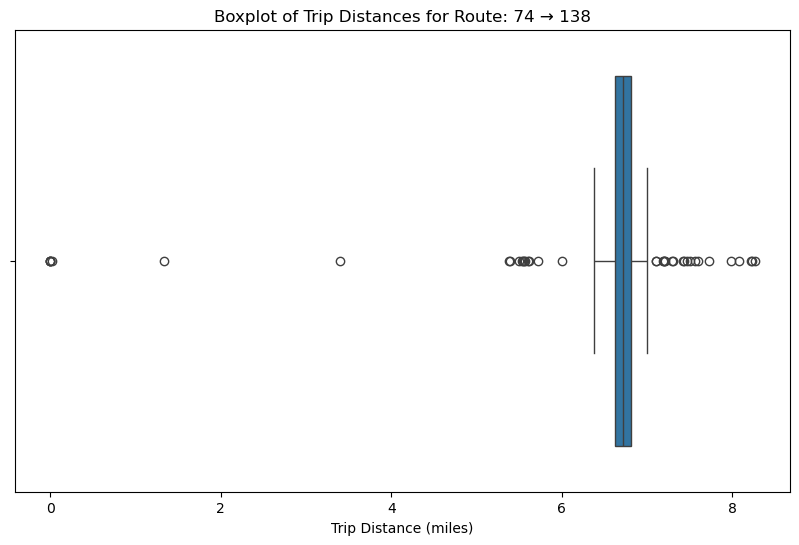


Payment type distribution for the route:
payment_type
1.0    159
2.0    27 
4.0    1  
Name: count, dtype: int64

Vendor ID distribution for the route:
VendorID
2    168
1    22 
Name: count, dtype: int64


In [133]:
# Identify the route with the maximum number of outliers
max_outlier_route = filtered_routes[filtered_routes['Total_Outliers'] == filtered_routes['Total_Outliers'].max()]

# Display the route information
print("Route with maximum outliers:")
print(max_outlier_route)

# Extract the specific PULocationID and DOLocationID for further investigation
pu_location_id = max_outlier_route['PULocationID'].values[0]
do_location_id = max_outlier_route['DOLocationID'].values[0]

#trips that associated with this data
investigation_df = df[(df['PULocationID'] == pu_location_id) & (df['DOLocationID'] == do_location_id)]

# df describe for the statistic function
print("\nInvestigating trips for the route:")
print(f"PULocationID: {pu_location_id}, DOLocationID: {do_location_id}")
print(investigation_df['trip_distance'].describe())

# plot the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=investigation_df, x='trip_distance',y=None, showfliers=True, legend=False)
plt.title(f'Boxplot of Trip Distances for Route: {pu_location_id} → {do_location_id}')
plt.xlabel('Trip Distance (miles)')
plt.show()

# check other variable that may relate to this outliers
payment_type_counts = investigation_df['payment_type'].value_counts()
print("\nPayment type distribution for the route:")
print(payment_type_counts)

vendorid_counts = investigation_df['VendorID'].value_counts()
print("\nVendor ID distribution for the route:")
print(vendorid_counts)


The clustering of trip distances may shows that there’s an expected trip distance for this route. However, given the high outlier count that is 172 whie the total trips is 190, it appears that the IQR method might be flagging values within this range inaccurately as outliers.

The visualization of the boxplot showing that we need to refined the outliers defitinition in this specific route. On the code below, we user the IQR method to defined the new bound and ajust the overall outliers flagging at outliers_trip

In [134]:
# Filter the data for 74-138 route
route_df = df[(df['PULocationID'] == 74) & (df['DOLocationID'] == 138)]

# Calculate Q1, Q3, and IQR for the 74-138
Q1_route = route_df['trip_distance'].quantile(0.25)
Q3_route = route_df['trip_distance'].quantile(0.75)
IQR_route = Q3_route - Q1_route

# Define adjusted bounds with the new multiplier for the route
adjusted_multiplier = 2.0
lower_bound_route = Q1_route - adjusted_multiplier * IQR_route
upper_bound_route = Q3_route + adjusted_multiplier * IQR_route

# Update `outliers_trip` for this route based on the adjusted bounds
df.loc[(df['PULocationID'] == 74) & (df['DOLocationID'] == 138), 'outliers_trip'] = (
    (df['trip_distance'] < lower_bound_route) | (df['trip_distance'] > upper_bound_route)
)

# Step 5: Verify the update by checking the count of remaining outliers for this route
remaining_outliers_route = df[(df['PULocationID'] == 74) & (df['DOLocationID'] == 138) & (df['outliers_trip'])].shape[0]

print(f"Remaining outliers for Route 74 → 138 after adjusted bounds: {remaining_outliers_route}")


Remaining outliers for Route 74 → 138 after adjusted bounds: 36


In [135]:
# Count the number of True values in the outliers_trip column
true_outlier_count = df['outliers_trip'].sum()  # True values are treated as 1 in sum
print(f"Number of outliers: {true_outlier_count}")

Number of outliers: 2151


The code above showing that the number of outliers is reduced. So from the data trip_distance the outliers data is 2151 data

Next We want to create a catoegory of the trip distance for better visualization

In [198]:
# Define bins  trip distance in minutes
category_distance = [-np.inf, 3, 6, 10, np.inf] 
distance_labels = ['<3 miles', '3-6 miles', '7-10 miles', '>10 miles']

# Categorize trip distance 

df['distance_category'] = pd.cut(df['trip_distance'], bins=category_distance, labels=distance_labels)

In [195]:
df['distance_category'].isna().sum()

3350

**Investigation of trip duration**

In this section, we will intepreting the number of the trip_duration and check the outliers in this area

In [136]:
# Calculate Q1 and Q3
Q1_dur = df['trip_duration'].quantile(0.25)
Q3_dur = df['trip_duration'].quantile(0.75)
IQR_dur = Q3_dur - Q1_dur

# Define lower and upper bounds
lower_bound_dur = Q1_dur - 1.5 * IQR_dur
upper_bound_dur = Q3_dur + 1.5 * IQR_dur



# Flag outliers
df['outliers_duration'] = (df['trip_duration'] < lower_bound_dur ) | (df['trip_duration'] > upper_bound_dur)
outliers_dur = df[(df['trip_duration'] < lower_bound_dur ) | (df['trip_duration'] > upper_bound_dur)]
print(f"Number of outliers in trip duration: {len(outliers_dur)}")
print(f"Lower Bound Duration: {(lower_bound_dur)}")
print(f"Upper Bound Duration: {(upper_bound_dur)}")

Number of outliers in trip duration: 3559
Lower Bound Duration: -8.183333333333335
Upper Bound Duration: 32.88333333333334


The output suggest the insight as follow:

- Number of Outliers in Trip Duration: There are 3,559 outliers identified based on the trip duration.
- The calculated lower bound for trip duration is -8.18 minutes, which is not meaningful for trip durations since negative durations aren't possible.
- The upper bound is approximately 32.88 minutes, which means any trips longer than this duration are flagged as outliers.
since the lower bound result is not make sense then, we need to 

In [137]:
# Update lower bound to 0 for trip duration
lower_bound_dur = max(0, lower_bound_dur)  # Ensures no negative lower bound

# Re-flag outliers with adjusted lower bounds
df['outliers_duration'] = (df['trip_duration'] < lower_bound_dur) | (df['trip_duration'] > upper_bound_dur)
outliers_dur = df[df['outliers_duration']]

# Display the new count and bounds
print(f"Adjusted Number of outliers in trip duration: {len(outliers_dur)}")
print(f"Adjusted Lower Bound Duration: {lower_bound_dur}")
print(f"Adjusted Upper Bound Duration: {upper_bound_dur}")

Adjusted Number of outliers in trip duration: 3559
Adjusted Lower Bound Duration: 0
Adjusted Upper Bound Duration: 32.88333333333334


Next step, we want to understand the distribution of the trip duration outliers

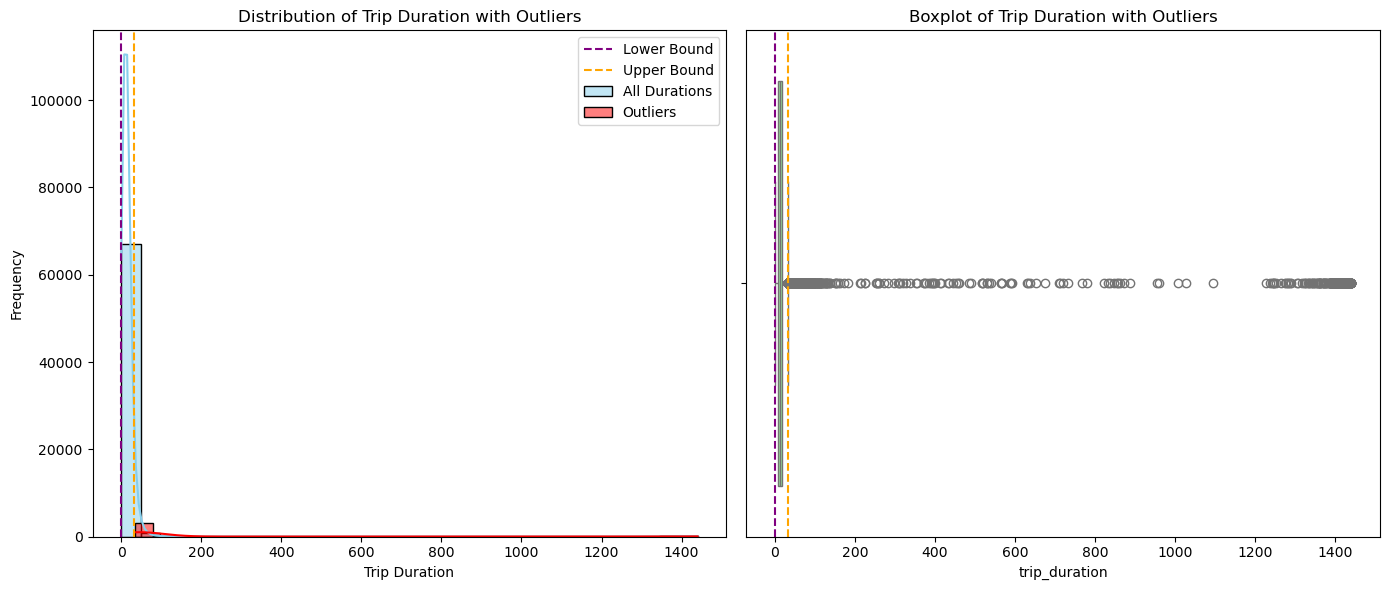

In [138]:
# Set up the chart size
plt.figure(figsize=(14, 6))

# Histogram of trip duration with outliers highlighted
plt.subplot(1, 2, 1)
sns.histplot(df, x='trip_duration', bins=30, kde=True, color='skyblue', label='All Durations')
sns.histplot(outliers_dur['trip_duration'], color='red', kde=True, bins=30, label='Outliers')
plt.axvline(lower_bound_dur, color='purple', linestyle='--', label='Lower Bound')
plt.axvline(upper_bound_dur, color='orange', linestyle='--', label='Upper Bound')
plt.xlabel('Trip Duration')
plt.ylabel('Frequency')
plt.title('Distribution of Trip Duration with Outliers')
plt.legend()

# Boxplot for trip duration with outliers highlighted
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='trip_duration', showfliers=True, color='lightgreen')
plt.axvline(lower_bound_dur, color='purple', linestyle='--', label='Lower Bound')
plt.axvline(upper_bound_dur, color='orange', linestyle='--', label='Upper Bound')
plt.title('Boxplot of Trip Duration with Outliers')

# Show the plot
plt.tight_layout()
plt.show()


The plot above showing the distribution of data and the outliers. Next step, we need to understand if the outliers is not a uinique route

In [139]:
# Group by PULocationID and DOLocationID and calculate duration statistics
route_duration_summary = (
    df.groupby(['PULocationID', 'DOLocationID'])
    .agg(
        Total_Trips=('trip_duration', 'size'),
        Avg_Duration=('trip_duration', 'mean'),
        Min_Duration=('trip_duration', 'min'),
        Max_Duration=('trip_duration', 'max'),
        Total_Outliers_Dur=('outliers_duration', 'sum')  # Counting outliers per route
    )
    .reset_index()
)

# Create a Route column for clarity
route_duration_summary['Route'] = (
    route_duration_summary['PULocationID'].astype(str) + " → " +
    route_duration_summary['DOLocationID'].astype(str)
)

# Display summary statistics of trip durations per route
print(route_duration_summary[['Route', 'Total_Trips', 'Avg_Duration', 'Min_Duration', 'Max_Duration', 'Total_Outliers_Dur']].head())

# Plotting Boxplot to visualize trip duration across different routes
#plt.figure(figsize=(14, 8))
#sns.boxplot(data=df, x='trip_duration', y=df['PULocationID'].astype(str) + " → " + df['DOLocationID'].astype(str), palette="coolwarm", showfliers=False)
#plt.title("Distribution of Trip Duration by Route")
#plt.xlabel("Trip Duration (minutes)")
#plt.ylabel("Route")
#plt.show()


     Route  Total_Trips  Avg_Duration  Min_Duration  Max_Duration  \
0  1 → 264  1            0.033333      0.033333      0.033333       
1  3 → 3    1            7.350000      7.350000      7.350000       
2  3 → 32   1            11.083333     11.083333     11.083333      
3  3 → 51   1            4.033333      4.033333      4.033333       
4  3 → 74   1            33.000000     33.000000     33.000000      

   Total_Outliers_Dur  
0  0                   
1  0                   
2  0                   
3  0                   
4  1                   


In [140]:
# Filter to show only routes with Total_Outliers_Dur > 0
routes_with_outliers = route_duration_summary[route_duration_summary['Total_Outliers_Dur'] > 0]

# Display summary statistics for routes with duration outliers
print(routes_with_outliers[['Route', 'Total_Trips', 'Avg_Duration', 'Min_Duration', 'Max_Duration', 'Total_Outliers_Dur']])

          Route  Total_Trips  Avg_Duration  Min_Duration  Max_Duration  \
4     3 → 74     1            33.000000     33.000000     33.000000      
10    7 → 7      476          9.046849      0.033333      1418.833333    
13    7 → 14     2            49.633333     33.866667     65.400000      
14    7 → 17     2            30.433333     26.000000     34.866667      
15    7 → 20     1            43.383333     43.383333     43.383333      
...      ...    ..                  ...           ...           ...      
5921  265 → 160  1            40.750000     40.750000     40.750000      
5922  265 → 228  1            33.733333     33.733333     33.733333      
5924  265 → 248  1            42.216667     42.216667     42.216667      
5925  265 → 251  1            62.400000     62.400000     62.400000      
5926  265 → 264  5            12.126667     0.000000      60.533333      

      Total_Outliers_Dur  
4     1                   
10    4                   
13    2                   
14 

C:\Users\tgs_e\AppData\Local\Temp\ipykernel_28560\26841002.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[df['outliers_duration']], x='trip_duration', hue=None,


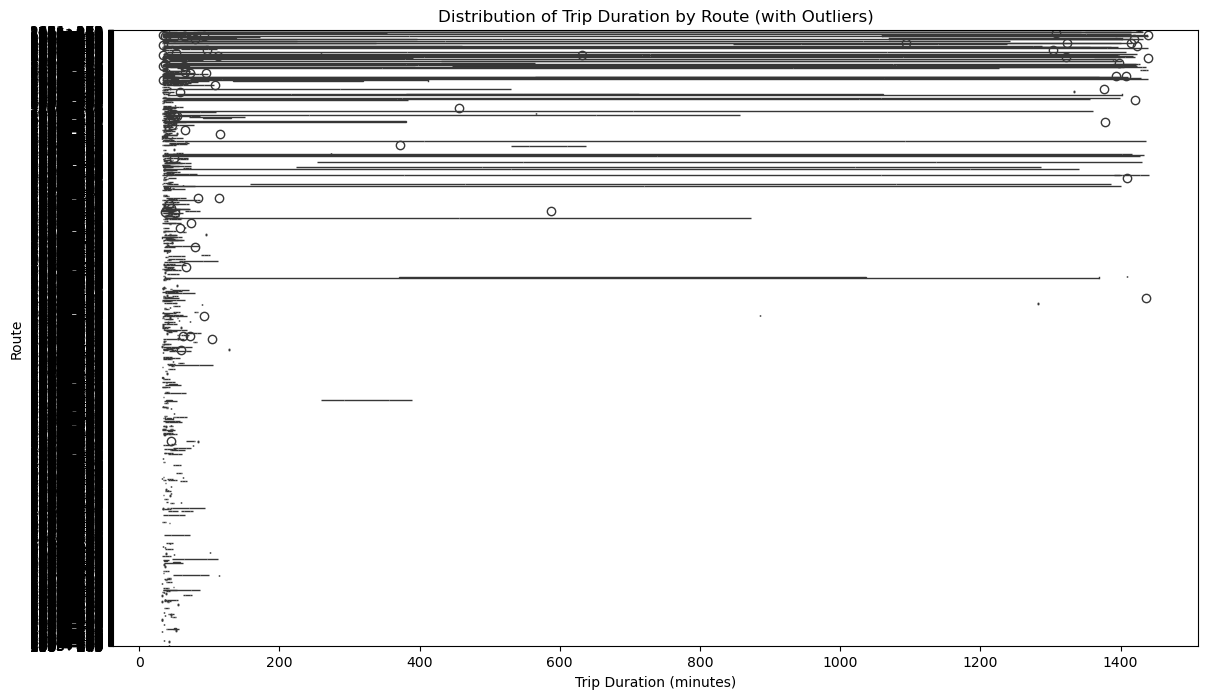

In [141]:
# Plotting Boxplot to visualize trip duration across different routes with outliers
plt.figure(figsize=(14, 8))
sns.boxplot(data=df[df['outliers_duration']], x='trip_duration', hue=None,
            y=df['PULocationID'].astype(str) + " → " + df['DOLocationID'].astype(str),
            palette="coolwarm", showfliers=True)
plt.title("Distribution of Trip Duration by Route (with Outliers)")
plt.xlabel("Trip Duration (minutes)")
plt.ylabel("Route")
plt.show()

In [142]:
route_duration_summary['Total_Outliers_Dur'].describe()

count    5928.000000
mean     0.600371   
std      1.439886   
min      0.000000   
25%      0.000000   
50%      0.000000   
75%      1.000000   
max      29.000000  
Name: Total_Outliers_Dur, dtype: float64

The summary above shows several insight of the trip duration outliers across routes:

- The number of analyzed route is 5,928. the average number of outlier trips per route is approximately 0.6. However, many routes have no outliers, as shown by the 25th and 50th percentiles (both at 0), indicating that more than half of the routes don't exhibit duration outliers.

- The 75th percentile of 1 means that one-quarter of the routes have at least one outlier, but the maximum value of 29 outliers in a single route signals that some routes see much greater variability in trip durations.

- Routes with a high number of outlier trips may indicate the locations of high congestion, highly variable traffic patterns, or routes that are very unusual in nature-for instance, high passenger demand for particular times of the day. Analysis of these high-outlier routes may find travel time variability patterns or specific external factors influencing the duration of a trip.

In [143]:
# Filter for the route(s) with the maximum number of trip duration outliers
max_outliers_route = route_duration_summary[route_duration_summary['Total_Outliers_Dur'] == route_duration_summary['Total_Outliers_Dur'].max()]

# Display the route information
print("Route(s) with the maximum number of duration outliers:")
print(max_outliers_route[['Route', 'Total_Trips', 'Avg_Duration', 'Min_Duration', 'Max_Duration', 'Total_Outliers_Dur']])


Route(s) with the maximum number of duration outliers:
          Route  Total_Trips  Avg_Duration  Min_Duration  Max_Duration  \
1382  55 → 55    80           30.278750     0.000000      109.75         
3984  166 → 132  31           53.884409     29.183333     95.70          

      Total_Outliers_Dur  
1382  29                  
3984  29                  


Route 55 → 55: This route is particularly noteworthy because it has the maximum outliers (29) with a relatively high average duration of over 30 minutes, but it also has a minimum duration of 0, which is unusual and suggests there may be several trips where either no distance was covered or that trips were recorded incorrectly. This could indicate cancellations or unusual trip patterns that need further investigation.

Route 166 → 132: This route has the same count of outliers but fewer total trips. It has a higher average duration compared to Route 55 → 55, indicating that the trips that were made had longer average durations and possibly more varied trip lengths.

So in this case the outliers indication will be flagged and indicated as real outliers

In the next step, the investgation of correlation between outliers of trip distance and trip duration is conducted

In [144]:
# Check how many outliers in trip duration are also outliers in trip distance

# Create a mask for outliers in trip duration and trip distance
outliers_duration_mask = df['outliers_duration']
outliers_distance_mask = df['outliers_trip']

#  find outliers that are in both categories
combined_outliers_mask = outliers_duration_mask & outliers_distance_mask

# Count the number of records that are outliers in both trip duration and trip distance
num_combined_outliers = df[combined_outliers_mask].shape[0]
num_combined_outliers


572

Create category of tripduration for better Visualization

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               68211 non-null  int64         
 1   lpep_pickup_datetime   68211 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  68211 non-null  datetime64[ns]
 3   store_and_fwd_flag     63887 non-null  object        
 4   RatecodeID             63887 non-null  float64       
 5   PULocationID           68211 non-null  int64         
 6   DOLocationID           68211 non-null  int64         
 7   passenger_count        63887 non-null  float64       
 8   trip_distance          68211 non-null  float64       
 9   fare_amount            68211 non-null  float64       
 10  extra                  68211 non-null  float64       
 11  mta_tax                68211 non-null  float64       
 12  tip_amount             68211 non-null  float64       
 13  t

In [181]:

# Define bins  trip duration in minutes
category_duration = [0, 5, 15, 30, 60, float('inf')]
duration_lable = ['<5 minutes', '5-15 minutes', '15-30 minutes', '30 minutes - 60 minutes', '>60 minutes']

# Categorize trip duration 
df['duration_category'] = pd.cut(df['trip_duration'], bins=category_duration, labels=duration_lable, right=False)

# Display the first few records to verify the categorization
print(df[['trip_duration', 'duration_category']].head())


   trip_duration duration_category
0  11.016667      5-15 minutes    
1  6.766667       5-15 minutes    
2  6.333333       5-15 minutes    
3  5.816667       5-15 minutes    
4  5.966667       5-15 minutes    


In [179]:
#check df info and null value before moving to next steps
df.isna().sum()

VendorID                 0   
lpep_pickup_datetime     0   
lpep_dropoff_datetime    0   
store_and_fwd_flag       0   
RatecodeID               0   
PULocationID             0   
DOLocationID             0   
passenger_count          0   
trip_distance            0   
fare_amount              0   
extra                    0   
mta_tax                  0   
tip_amount               0   
tolls_amount             0   
improvement_surcharge    0   
total_amount             0   
payment_type             0   
trip_type                0   
congestion_surcharge     0   
PUBorough                201 
PUZone                   201 
PUservice_zone           201 
DOBorough                668 
DOZone                   668 
DOservice_zone           668 
trip_duration            0   
is_negative_total        0   
outliers_trip            0   
outliers_duration        0   
duration_category        0   
outliers_fare            0   
outliers_total           0   
pickup_hour              0   
pickup_day

In [180]:
df['distance_category'].head()

0    3-6 miles
1    <2 miles 
2    NaN      
3    <2 miles 
4    <2 miles 
Name: distance_category, dtype: category
Categories (4, object): ['<2 miles' < '3-6 miles' < '7-10 miles' < '>10 miles']

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               68211 non-null  int64         
 1   lpep_pickup_datetime   68211 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  68211 non-null  datetime64[ns]
 3   store_and_fwd_flag     68211 non-null  object        
 4   RatecodeID             68211 non-null  float64       
 5   PULocationID           68211 non-null  int64         
 6   DOLocationID           68211 non-null  int64         
 7   passenger_count        68211 non-null  float64       
 8   trip_distance          68211 non-null  float64       
 9   fare_amount            68211 non-null  float64       
 10  extra                  68211 non-null  float64       
 11  mta_tax                68211 non-null  float64       
 12  tip_amount             68211 non-null  float64       
 13  t

---
**2.2.3 Outliers in fare amount and total_amount**
<br>
In calculation of outliers in fare_amount and total_amount, the correlation botFirst, we will check the correlation between the fare_amount and total_amount to confirm that they are highly correlated.

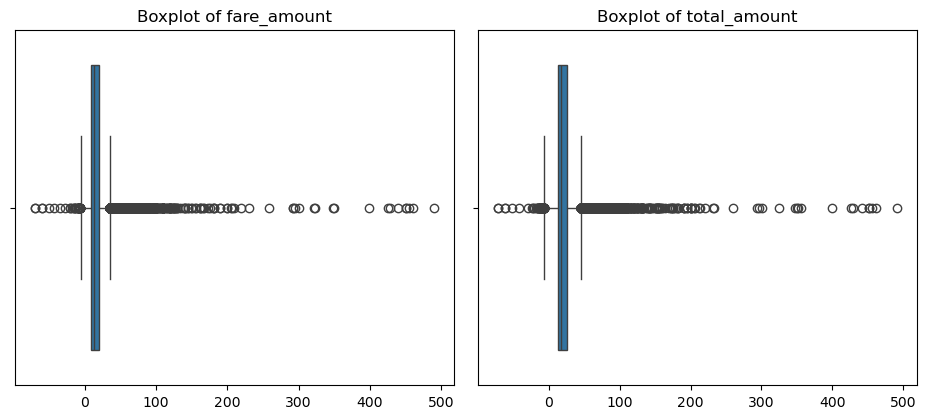

In [201]:
# Select relevant columns for outlier detection
features3 = ['fare_amount','total_amount']

# Set up the plotting area
plt.figure(figsize=(14, 8))
for i, feature in enumerate(features3, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.xlabel('')

plt.tight_layout()
plt.show()

In [147]:
correlation = df['fare_amount'].corr(df['total_amount'])
print(f"Correlation between fare_amount and total_amount: {correlation}")

Correlation between fare_amount and total_amount: 0.9677643531340596


In [148]:
# Calculate Q1 and Q3 for fare_amount
Q1_fare = df['fare_amount'].quantile(0.25)
Q3_fare = df['fare_amount'].quantile(0.75)
IQR_fare = Q3_fare - Q1_fare
# Define lower and upper bounds for fare_amount
lower_bound_fare = Q1_fare - 1.5 * IQR_fare
upper_bound_fare = Q3_fare + 1.5 * IQR_fare

# Flag outliers for fare_amount
df['outliers_fare'] = (df['fare_amount'] < lower_bound_fare) | (df['fare_amount'] > upper_bound_fare)

# Calculate Q1 and Q3 for total_amount
Q1_total = df['total_amount'].quantile(0.25)
Q3_total = df['total_amount'].quantile(0.75)
IQR_total = Q3_total - Q1_total
# Define lower and upper bounds for total_amount
lower_bound_total = Q1_total - 1.5 * IQR_total
upper_bound_total = Q3_total + 1.5 * IQR_total

# Flag outliers for total_amount
df['outliers_total'] = (df['total_amount'] < lower_bound_total) | (df['total_amount'] > upper_bound_total)

In [149]:
# Count of outliers in fare_amount
fare_outliers_count = df['outliers_fare'].sum()

# Count of outliers in total_amount
total_outliers_count = df['outliers_total'].sum()

# Count of records that are outliers in both
both_outliers_count = df[(df['outliers_fare']) & (df['outliers_total'])].shape[0]

print(f"Total outliers in fare_amount: {fare_outliers_count}")
print(f"Total outliers in total_amount: {total_outliers_count}")
print(f"Total records that are outliers in both fare_amount and total_amount: {both_outliers_count}")


Total outliers in fare_amount: 4339
Total outliers in total_amount: 4064
Total records that are outliers in both fare_amount and total_amount: 3470


The summary above saying that
The large number of overlapping outliers (3,470) between fare_amount and total_amount indicates that many trips with unusual fare amounts also have unusual total amounts. This correlation is expected due to the high correlation coefficient (0.97) between the two variables.

Implications for Analysis:

Since the outliers in fare_amount and total_amount are closely linked, analyzing them together can provide insights into pricing strategies, customer behavior, and the factors that contribute to high fares and totals, such as trip duration, distance, or external conditions. Outliers in both amounts may signify exceptional trips, including long distances, extended durations, or unique fare structures that differ from the norm.

In [150]:
all_outliers_negatives =  df[(df['outliers_fare']) & (df['outliers_total']) & (df['is_negative_total'])].shape[0]
print(f"Total records that are outliers : {all_outliers_negatives}")

Total records that are outliers : 41


In [151]:
all_outliers_count = df[(df['outliers_fare']) & (df['outliers_total']) & (df['outliers_duration']) & (df['outliers_trip'])].shape[0]
print(f"Total records that are outliers in both fare_amount and total_amount: {all_outliers_count}")

Total records that are outliers in both fare_amount and total_amount: 386


---
**2.3 Nan value investigation and treatment**
<br>
These datas has same percentage of missing values.
- store_and_fwd_flag 6.339154 %
- RatecodeID 6.339154 %
- passenger_count            6.339154  %
- payment_type               6.339154 %
- trip_type                  6.353814 %
- congestion_surcharge       6.339154 %


It's interesting to find that the missing value data has a specific pattern from record 68070 onward, this pattern can be seen on heatmap above below subsection missing values. So in this step, we need to understand the implication of the missing value of those records.
<br>

If we can understand the root cause of the missing data, we can understand what can we do.
In this part the data exploration of the missing data will be done as follow : 
- Check for patterns in the missing values. For example whether certain RateCodeID values correlate with missing passenger_count or payment_type, this pattern could indicate that specific trip types are more likely to have missing values.
- Analyze whether certain vendors (from the VendorID) have higher number of missing data.
- Check if there are any specific dates or time periods when the missing values are concentrated.
- Analyze the attributes of trips in this range, such as PULocationID, DOLocationID, RateCodeID, payment_type, et

Add new feature to investigate more detail about the data. In this step, from the data lpep_pickup_datetime, we extract hour, day, date, and month

In [152]:
#extract features for the dates so that we can understand detail and creates grouping based on the dates
df['pickup_hour'] = pd.to_datetime(df['lpep_pickup_datetime']).dt.hour
df['pickup_day'] = pd.to_datetime(df['lpep_pickup_datetime']).dt.dayofweek
df['pickup_date'] = df['lpep_pickup_datetime'].dt.date
df['pickup_month'] = df['lpep_pickup_datetime'].dt.month      
df['is_weekend'] = df['pickup_day'].apply(lambda x: 1 if x >= 5 else 0)  # Weekend indicator
df['pickup_year'] = df['lpep_pickup_datetime'].dt.year


In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               68211 non-null  int64         
 1   lpep_pickup_datetime   68211 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  68211 non-null  datetime64[ns]
 3   store_and_fwd_flag     63887 non-null  object        
 4   RatecodeID             63887 non-null  float64       
 5   PULocationID           68211 non-null  int64         
 6   DOLocationID           68211 non-null  int64         
 7   passenger_count        63887 non-null  float64       
 8   trip_distance          68211 non-null  float64       
 9   fare_amount            68211 non-null  float64       
 10  extra                  68211 non-null  float64       
 11  mta_tax                68211 non-null  float64       
 12  tip_amount             68211 non-null  float64       
 13  t

In [154]:
missing_data = df.isnull().mean() * 100
print("Percentage of missing values in each column:\n", missing_data)

Percentage of missing values in each column:
 VendorID                 0.000000
lpep_pickup_datetime     0.000000
lpep_dropoff_datetime    0.000000
store_and_fwd_flag       6.339154
RatecodeID               6.339154
PULocationID             0.000000
DOLocationID             0.000000
passenger_count          6.339154
trip_distance            0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
payment_type             6.339154
trip_type                6.353814
congestion_surcharge     6.339154
PUBorough                0.294674
PUZone                   0.294674
PUservice_zone           0.294674
DOBorough                0.979314
DOZone                   0.979314
DOservice_zone           0.979314
trip_duration            0.000000
is_negative_total        0.000000
outliers_trip            0.000000
ou

In [155]:
# Analyze patterns in missing data by vendorID

# Vendor-based missing data analysis
vendor_missing_data = df.groupby('VendorID').apply(lambda x: x.isnull().mean() * 100, include_groups=False)
#print("Missing data percentage by VendorID:\n", vendor_missing_data)

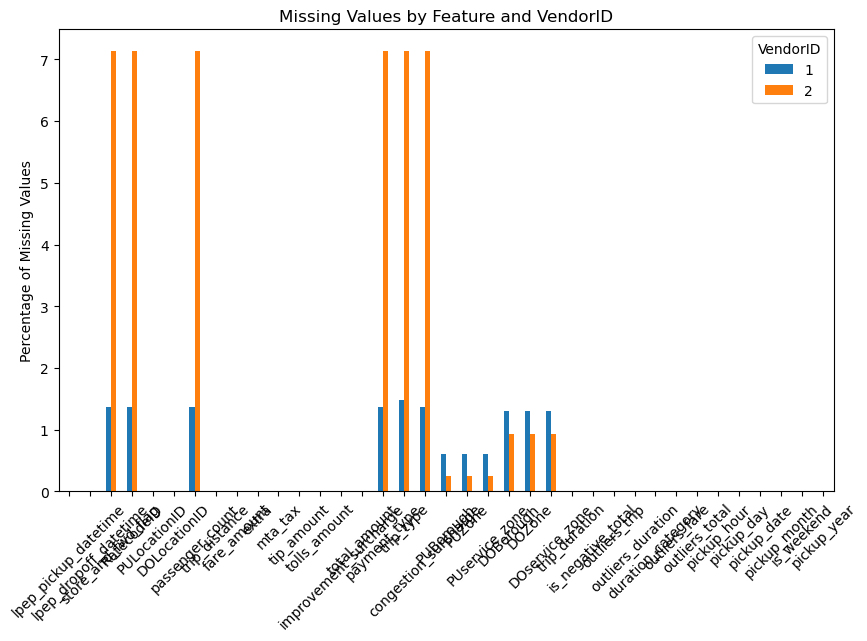

In [156]:
# Plot missing values by VendorID
vendor_missing_data.T.plot(kind='bar', figsize=(10, 6))
plt.ylabel("Percentage of Missing Values")
plt.title("Missing Values by Feature and VendorID")
plt.xticks(rotation=45)
plt.show()

Based on the visualization above, vendor 2 has more missing data than vendor 1

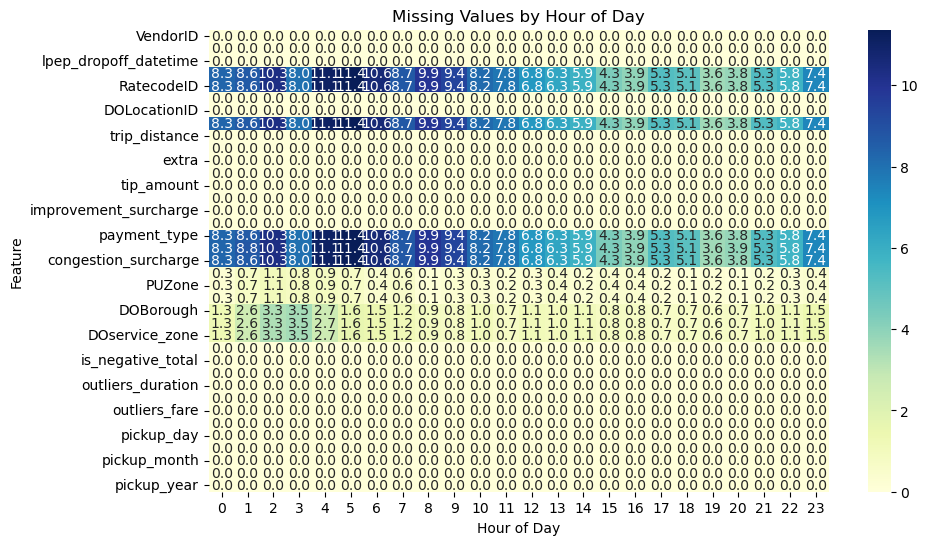

In [157]:
# Calculate missing data percentage by pickup hour
hourly_missing_data = df.groupby('pickup_hour').apply(lambda x: x.isnull().mean() * 100, include_groups=False)
#print("Missing data percentage by Pickup Hour:\n", hourly_missing_data)

# Plot missing data by hour
plt.figure(figsize=(10, 6))
sns.heatmap(hourly_missing_data.T, cmap="YlGnBu", annot=True, fmt=".1f")
plt.title("Missing Values by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Feature")
plt.show()

Based on the plot above, The missing value is distributed on hour of the day

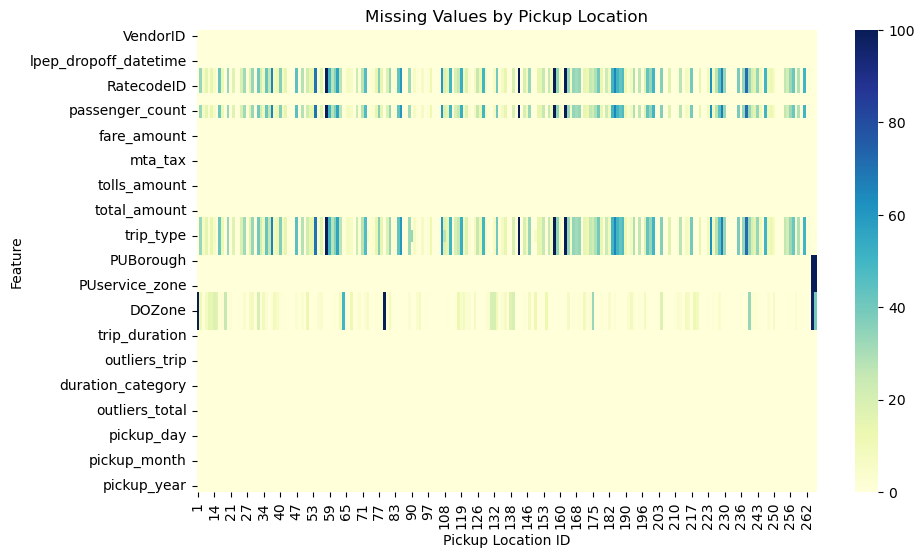

In [158]:
# Location-based missing data analysis: check if missing data is location-related
# Calculate missing data percentage by pickup location ID
location_missing_data = df.groupby('PULocationID').apply(lambda x: x.isnull().mean() * 100, include_groups=False)

#print("Missing data percentage by Pickup Location ID:\n", location_missing_data)

# Plot missing data by location
plt.figure(figsize=(10, 6))
sns.heatmap(location_missing_data.T, cmap="YlGnBu", annot=False)
plt.title("Missing Values by Pickup Location")
plt.xlabel("Pickup Location ID")
plt.ylabel("Feature")
plt.show()

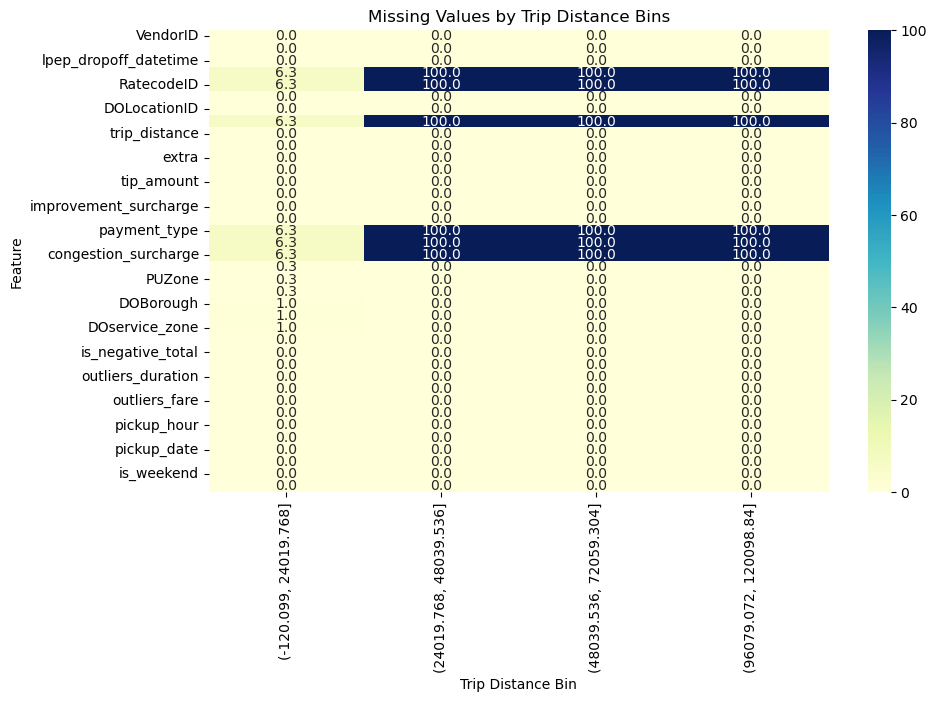

In [159]:

# Check if shorter or longer trips have more missing values

distance_missing = df.groupby(pd.cut(df['trip_distance'], bins=5), observed=True).apply(lambda x: x.isnull().mean() * 100)

#print("Missing data percentage by Trip Distance Bins:\n", distance_missing)

# Plot missing data by trip distance bins
plt.figure(figsize=(10, 6))
sns.heatmap(distance_missing.T, cmap="YlGnBu", annot=True, fmt=".1f")
plt.title("Missing Values by Trip Distance Bins")
plt.xlabel("Trip Distance Bin")
plt.ylabel("Feature")
plt.show()


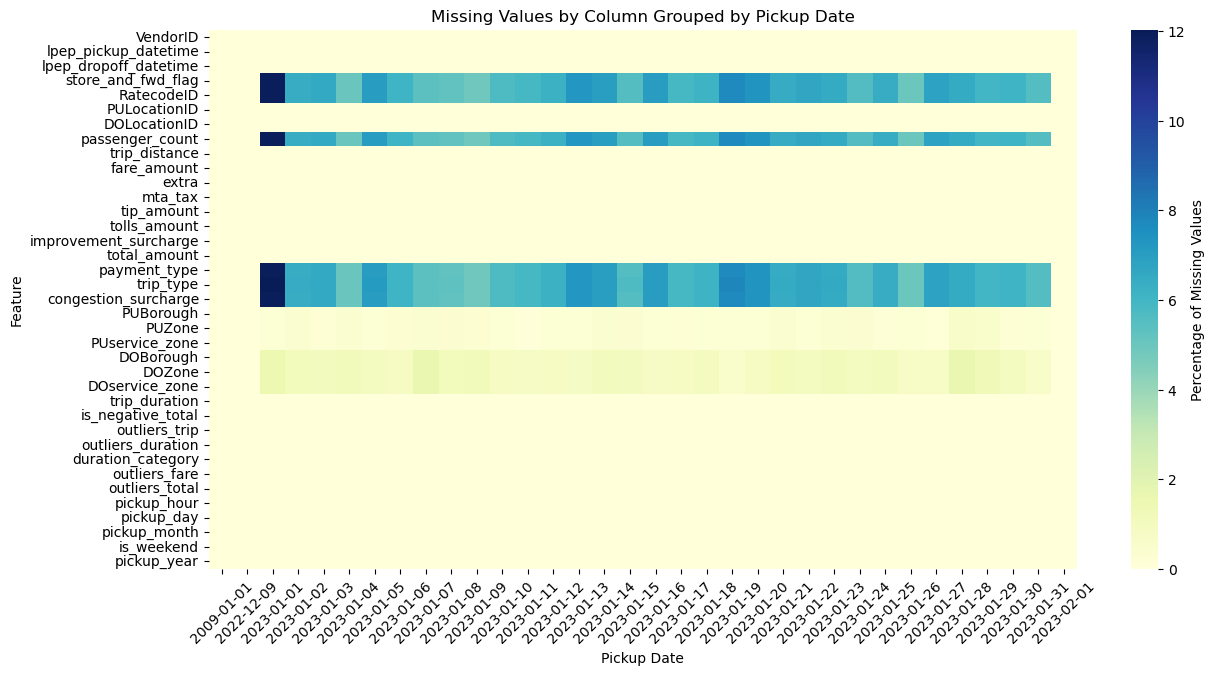

In [160]:
# Group by the extracted date and calculate missing values
date_missing_data = df.groupby('pickup_date').apply(lambda x: x.isnull().mean() * 100, include_groups=False)


# Results
#print("Percentage of missing values grouped by pickup date:")
#print(date_missing_data)

# Plot the data for better understanding
plt.figure(figsize=(14, 7))
sns.heatmap(date_missing_data.T, cmap="YlGnBu", annot=False, cbar_kws={'label': 'Percentage of Missing Values'})
plt.title("Missing Values by Column Grouped by Pickup Date")
plt.xlabel("Pickup Date")
plt.ylabel("Feature")
plt.xticks(rotation=45)
plt.show()

The plot of the data above showing that the missing value also ditributed among the 

In [161]:
# Define columns to check for missing values
columns_to_check = ['store_and_fwd_flag', 'RatecodeID', 'passenger_count', 'payment_type', 'trip_type', 'congestion_surcharge']

# Group by year and month and calculate the percentage of missing values
missing_values_by_month_year = df.groupby(['pickup_year', 'pickup_month'])[columns_to_check].apply(lambda x: x.isnull().mean() * 100)

# Reset index for better visualization
missing_values_by_month_year = missing_values_by_month_year.reset_index()

# Display the results
print("Percentage of missing values grouped by Year and Month:\n", missing_values_by_month_year)

Percentage of missing values grouped by Year and Month:
    pickup_year  pickup_month  store_and_fwd_flag  RatecodeID  passenger_count  \
0  2009         1             0.000000            0.000000    0.000000          
1  2022         12            0.000000            0.000000    0.000000          
2  2023         1             6.339525            6.339525    6.339525          
3  2023         2             0.000000            0.000000    0.000000          

   payment_type  trip_type  congestion_surcharge  
0  0.000000      0.000000   0.000000              
1  0.000000      0.000000   0.000000              
2  6.339525      6.354187   6.339525              
3  0.000000      0.000000   0.000000              


For January 2009 and December 2022, there are no missing values in any of the specified columns. This suggests that the data for these periods is complete.
In January 2023, there is a noticeable percentage (approximately 6.34%) of missing values across multiple columns. This could indicate the cause of the missing value is a potential issue with data collection, processing, or changes in reporting practices during this time.

In contrast, for February 2023, there are no missing values across the columns analyzed, indicating improved data integrity compared to January.

After identifying the causes of missing values in the dataset, it's important to treat these missing values appropriately based on their data types and the nature of the dataset.

In [162]:
#add flagging to missing value row in order to be considered in the futer. this new flagging can be added since the dimetion of the data is not too big
#later this column can be dropped if not used
df['missing_flag'] = df[['store_and_fwd_flag', 'RatecodeID', 'passenger_count', 'payment_type','trip_type','congestion_surcharge']].isnull().any(axis=1)

In [163]:

# `store_and_fwd_flag` (categorical with 'Y' or 'N')
# Fill missing values with the mode ('N' - assuming most trips are not stored)
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].fillna(df['store_and_fwd_flag'].mode()[0])

#`RatecodeID` (categorical with specific codes)
# Fill with the most common rate code
df['RatecodeID']= df['RatecodeID'].fillna(df['RatecodeID'].mode()[0])

#  `trip_type` (categorical with specific codes)
# Fill with mode, as most trips are likely '1' (Street-hail)
df['trip_type']= df['trip_type'].fillna(df['trip_type'].mode()[0])

# `congestion_surcharge` (numerical)
# Fill with 0, because congestion surcharge may not apply for some trips
df['congestion_surcharge'] = df['congestion_surcharge'].fillna(0)



In [164]:
# `payment_type` (categorical with specific codes)
# Fill missing values with mode, assume that the most frequent payment type are '1' (Credit card) or '2' (Cash)
df['payment_type'] = df['payment_type'].fillna(df['payment_type'].mode()[0])

In [165]:
# `passenger_count` (numerical)
# Fill with median, assuming passenger count is skewed (median might be more representative than mean)
df['passenger_count'] = df['passenger_count'].fillna(df['passenger_count'].median())

In [166]:
# Verifying that missing values have been replaced and no missing value left
print("Missing values after treatment:\n", df.isnull().sum())

Missing values after treatment:
 VendorID                 0  
lpep_pickup_datetime     0  
lpep_dropoff_datetime    0  
store_and_fwd_flag       0  
RatecodeID               0  
PULocationID             0  
DOLocationID             0  
passenger_count          0  
trip_distance            0  
fare_amount              0  
extra                    0  
mta_tax                  0  
tip_amount               0  
tolls_amount             0  
improvement_surcharge    0  
total_amount             0  
payment_type             0  
trip_type                0  
congestion_surcharge     0  
PUBorough                201
PUZone                   201
PUservice_zone           201
DOBorough                668
DOZone                   668
DOservice_zone           668
trip_duration            0  
is_negative_total        0  
outliers_trip            0  
outliers_duration        0  
duration_category        0  
outliers_fare            0  
outliers_total           0  
pickup_hour              0  
pickup_day

After treating the missing values according to the data types and the specific context of the dataset, hopefully it can enhance the quality of the data and ensure that subsequent analyses are more reliable and valid.

---

---
**Step 3: Nan value in borough file**

Based on the summary above, There are some missing value on borough file. since it populate only <1% percentag, then i will mark this data as unknown

In [199]:
# List of columns to set NaN values to "unknown"
columns_to_update = ['PUBorough', 'PUZone', 'PUservice_zone', 'DOBorough', 'DOZone', 'DOservice_zone']

# Replace NaN values with "unknown" in the specified columns
df[columns_to_update] = df[columns_to_update].fillna("unknown")

# Optional: Check the result
print(df[columns_to_update].isna().sum())
print(df[columns_to_update].head())

PUBorough         0
PUZone            0
PUservice_zone    0
DOBorough         0
DOZone            0
DOservice_zone    0
dtype: int64
   PUBorough               PUZone PUservice_zone  DOBorough  \
0  Manhattan  Morningside Heights  Boro Zone      Manhattan   
1  Manhattan  Bloomingdale         Yellow Zone    Manhattan   
2  Queens     Steinway             Boro Zone      Queens      
3  Manhattan  Central Harlem       Boro Zone      Manhattan   
4  Manhattan  Central Harlem       Boro Zone      Manhattan   

                  DOZone DOservice_zone  
0  Lincoln Square West    Yellow Zone    
1  Central Park           Yellow Zone    
2  Old Astoria            Boro Zone      
3  Upper West Side North  Yellow Zone    
4  East Harlem North      Boro Zone      


---
**Step 4: Deeper Investigation on duplicates data**

In general there are no diplucates data on the dataset but we need to look more detail on probability of data duplication in certain column such as VendorID, lp

In [226]:
# Make duplicated by subset data
duplicated_data = df[df.duplicated(subset=['lpep_pickup_datetime', 'lpep_dropoff_datetime', 'RatecodeID', 'PULocationID', 'DOLocationID', 'passenger_count', 'trip_distance'], keep=False)]
duplicated_data

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,outliers_total,pickup_hour,pickup_day,pickup_date,pickup_month,is_weekend,pickup_year,missing_flag,is_high_demand,distance_category
662,2: VeriFoneInc.,2023-01-01 14:58:13,2023-01-01 14:58:39,N,1: Standard Rate,75,74,2.0,0.17,-3.0,...,False,14,6,2023-01-01,1,1,2023,False,1,<3 miles
663,2: VeriFoneInc.,2023-01-01 14:58:13,2023-01-01 14:58:39,N,1: Standard Rate,75,74,2.0,0.17,3.0,...,False,14,6,2023-01-01,1,1,2023,False,1,<3 miles
898,2: VeriFoneInc.,2023-01-01 17:24:52,2023-01-01 17:25:12,N,1: Standard Rate,193,193,1.0,0.00,-3.0,...,False,17,6,2023-01-01,1,1,2023,False,1,<3 miles
899,2: VeriFoneInc.,2023-01-01 17:24:52,2023-01-01 17:25:12,N,1: Standard Rate,193,193,1.0,0.00,3.0,...,False,17,6,2023-01-01,1,1,2023,False,1,<3 miles
1317,2: VeriFoneInc.,2023-01-02 02:05:08,2023-01-02 02:12:57,N,1: Standard Rate,129,82,1.0,0.64,-8.6,...,True,2,0,2023-01-02,1,0,2023,False,1,<3 miles
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63656,2: VeriFoneInc.,2023-01-31 20:29:00,2023-01-31 20:29:14,N,1: Standard Rate,74,74,1.0,0.00,2.5,...,False,20,1,2023-01-31,1,0,2023,False,1,<3 miles
63807,2: VeriFoneInc.,2023-01-31 22:44:16,2023-01-31 22:45:18,N,1: Standard Rate,256,256,1.0,0.15,-3.7,...,False,22,1,2023-01-31,1,0,2023,False,1,<3 miles
63808,2: VeriFoneInc.,2023-01-31 22:44:16,2023-01-31 22:45:18,N,1: Standard Rate,256,256,1.0,0.15,3.7,...,False,22,1,2023-01-31,1,0,2023,False,1,<3 miles
63868,2: VeriFoneInc.,2023-01-31 23:44:44,2023-01-31 23:45:15,N,5: Unknown,264,264,1.0,0.00,-10.0,...,True,23,1,2023-01-31,1,0,2023,False,1,<3 miles


In [227]:
# Add a new column 'is_duplicated' to flag duplicates
df['is_duplicated'] = df.duplicated(
    subset=['lpep_pickup_datetime', 'lpep_dropoff_datetime', 'RatecodeID', 'PULocationID', 'DOLocationID', 'passenger_count', 'trip_distance'],
    keep=False
)

# Display rows that are marked as duplicated
duplicated_data = df[df['is_duplicated']]
print(duplicated_data)

              VendorID lpep_pickup_datetime lpep_dropoff_datetime  \
662    2: VeriFoneInc. 2023-01-01 14:58:13  2023-01-01 14:58:39     
663    2: VeriFoneInc. 2023-01-01 14:58:13  2023-01-01 14:58:39     
898    2: VeriFoneInc. 2023-01-01 17:24:52  2023-01-01 17:25:12     
899    2: VeriFoneInc. 2023-01-01 17:24:52  2023-01-01 17:25:12     
1317   2: VeriFoneInc. 2023-01-02 02:05:08  2023-01-02 02:12:57     
...                ...                 ...                  ...     
63656  2: VeriFoneInc. 2023-01-31 20:29:00  2023-01-31 20:29:14     
63807  2: VeriFoneInc. 2023-01-31 22:44:16  2023-01-31 22:45:18     
63808  2: VeriFoneInc. 2023-01-31 22:44:16  2023-01-31 22:45:18     
63868  2: VeriFoneInc. 2023-01-31 23:44:44  2023-01-31 23:45:15     
63869  2: VeriFoneInc. 2023-01-31 23:44:44  2023-01-31 23:45:15     

      store_and_fwd_flag        RatecodeID  PULocationID  DOLocationID  \
662    N                  1: Standard Rate  75            74             
663    N               

---
**Step 5: Other Investigation and Cleaning**

**3.1: RatecodeID 99**
<br>
On the real data , there is ratecodeID 99. But on the data docs theres no category 99, so to make sure the data has same definition, ratecodeID 99 change into 6

In [167]:
# Identify and display the data with RatecodeID 99
ratecode_99_data = df[df['RatecodeID'] == 99]
print("Data with RatecodeID 99 before change:")
print(ratecode_99_data)




Data with RatecodeID 99 before change:
       VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
1084   1        2023-01-01 19:44:13  2023-01-01 19:58:30    N                   
2174   1        2023-01-02 16:39:05  2023-01-02 17:31:42    N                   
9055   1        2023-01-05 20:33:45  2023-01-05 22:46:41    N                   
14125  1        2023-01-08 11:36:41  2023-01-08 12:14:59    N                   
29143  1        2023-01-15 13:51:42  2023-01-15 14:37:38    N                   
29711  1        2023-01-15 17:52:52  2023-01-15 22:11:55    N                   
35975  1        2023-01-19 01:07:59  2023-01-19 01:17:19    N                   
37691  1        2023-01-19 17:16:59  2023-01-19 22:29:53    N                   
42432  1        2023-01-21 20:29:58  2023-01-22 02:59:25    N                   
45204  1        2023-01-23 13:45:11  2023-01-23 23:36:42    N                   

       RatecodeID  PULocationID  DOLocationID  passenger_count  trip_

In [168]:
# Change RatecodeID from 99 to 6
df.loc[df['RatecodeID'] == 99, 'RatecodeID'] = 6

# Verify the change
updated_ratecode_99_data = df[df['RatecodeID'] == 6]
print("\nData with RatecodeID 6 after change:")
print(updated_ratecode_99_data)


Data with RatecodeID 6 after change:
       VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
1084   1        2023-01-01 19:44:13  2023-01-01 19:58:30    N                   
2174   1        2023-01-02 16:39:05  2023-01-02 17:31:42    N                   
9055   1        2023-01-05 20:33:45  2023-01-05 22:46:41    N                   
14125  1        2023-01-08 11:36:41  2023-01-08 12:14:59    N                   
29143  1        2023-01-15 13:51:42  2023-01-15 14:37:38    N                   
29711  1        2023-01-15 17:52:52  2023-01-15 22:11:55    N                   
35975  1        2023-01-19 01:07:59  2023-01-19 01:17:19    N                   
37691  1        2023-01-19 17:16:59  2023-01-19 22:29:53    N                   
42432  1        2023-01-21 20:29:58  2023-01-22 02:59:25    N                   
45204  1        2023-01-23 13:45:11  2023-01-23 23:36:42    N                   

       RatecodeID  PULocationID  DOLocationID  passenger_count  trip_d

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               68211 non-null  int64         
 1   lpep_pickup_datetime   68211 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  68211 non-null  datetime64[ns]
 3   store_and_fwd_flag     68211 non-null  object        
 4   RatecodeID             68211 non-null  float64       
 5   PULocationID           68211 non-null  int64         
 6   DOLocationID           68211 non-null  int64         
 7   passenger_count        68211 non-null  float64       
 8   trip_distance          68211 non-null  float64       
 9   fare_amount            68211 non-null  float64       
 10  extra                  68211 non-null  float64       
 11  mta_tax                68211 non-null  float64       
 12  tip_amount             68211 non-null  float64       
 13  t

**3.2: Passenger count 0**
<br>
On the real data , there are data with passenger_count 0. This code run to investigate the correlation of 0 passenger

In [170]:
zero_passenger_count = df[df['passenger_count'] == 0]

# Display the count of zero passenger count records
print("Total trips with zero passenger count:", zero_passenger_count.shape[0])

# Check for relevant columns that might indicate the reason
# Replace 'trip_status', 'fare_amount', 'total_amount', 'payment_type', etc. with your actual column names
relevant_columns = ['trip_duration','fare_amount', 'total_amount', 'payment_type', 'pickup_date']
zero_passenger_analysis = zero_passenger_count[relevant_columns]

# Display summary statistics of these trips
print(zero_passenger_analysis.describe(include='all'))

# Check the distribution of trip statuses if applicable
trip_status_counts = zero_passenger_analysis['trip_duration'].value_counts()
print("\nDistribution of trip statuses for zero passenger counts:")
print(trip_status_counts)

# Check for unique payment types
unique_payment_types = zero_passenger_analysis['payment_type'].unique()
print("\nUnique payment types for zero passenger counts:")
print(unique_payment_types)

Total trips with zero passenger count: 336
        trip_duration  fare_amount  total_amount  payment_type pickup_date
count   336.000000     336.000000   336.000000    336.000000    336       
unique NaN            NaN          NaN           NaN            31        
top    NaN            NaN          NaN           NaN            2023-01-21
freq   NaN            NaN          NaN           NaN            18        
mean    11.700000      13.865268    18.840655     1.389881      NaN       
std     10.295110      11.038848    13.260341     0.562313      NaN       
min     0.000000       0.000000     0.000000      1.000000      NaN       
25%     5.600000       7.900000     11.037500     1.000000      NaN       
50%     10.058333      11.400000    16.275000     1.000000      NaN       
75%     15.208333      16.300000    21.375000     2.000000      NaN       
max     68.833333      75.800000    99.840000     4.000000      NaN       

Distribution of trip statuses for zero passenger counts:

Since there are no identifiable pattern for 0 pessanger, this condition probably because of the human error from the driver since the data is input manualy by the driver. So in this case we want to replace 0 value of passenger with media value

In [232]:
#Replace 0 value into median values
df['passenger_count'] = df['passenger_count'].replace(0, df['passenger_count'].median())

In [233]:
df['passenger_count'].unique()

array([1., 2., 4., 3., 6., 5., 7., 9., 8.])

**3.3: Change category of payment for better understanding on Visualization**
<br>

In [203]:
df['payment_type']=df['payment_type'].replace({1:'1: Credit card', 2:'2: Cash', 3:'3: No charge', 4:'4: Dispute', 5:'5: Unknown', 6:'6: Voided trip'})
df['payment_type'].value_counts()

payment_type
1: Credit card    45010
2: Cash           22632
3: No charge      472  
4: Dispute        95   
5: Unknown        2    
Name: count, dtype: int64

**4.4: Change category of VendorID for better understanding on Visualization**
<br>

In [209]:
df['VendorID'].value_counts()

VendorID
2: VeriFoneInc.                       58868
1: CreativeMobileTechnologies,LLC.    9343 
Name: count, dtype: int64

In [216]:
df['VendorID']=df['VendorID'].replace({1:'1: CreativeMobileTechnologies,LLC.', 2:'2: VeriFoneInc.'})
df['VendorID'].value_counts()

VendorID
2: VeriFoneInc.                       58868
1: CreativeMobileTechnologies,LLC.    9343 
Name: count, dtype: int64

**4.5: Change category of Trip Type for better understanding on Visualization**

In [206]:
df['trip_type'].value_counts()

trip_type
1.0    66810
2.0    1401 
Name: count, dtype: int64

In [208]:
df['trip_type']=df['trip_type'].replace({1:'Street-hail', 2:'Dispatch'})
df['trip_type'].value_counts()

trip_type
Street-hail    66810
Dispatch       1401 
Name: count, dtype: int64

**4.6: Change category of Ratecode ID for better understanding on Visualization**

In [211]:
df['RatecodeID'].value_counts()

RatecodeID
1.0    66427
5.0    1529 
2.0    158  
4.0    57   
3.0    30   
6.0    10   
Name: count, dtype: int64

In [215]:
df['RatecodeID']=df['RatecodeID'].replace({1:'Standard Rate', 2:'JFK', 3:'Newark', 4:'NassauorWestchester', 5:'Negotiated fare', 6:'Groupride'})
df['RatecodeID'].value_counts()

RatecodeID
1: Standard Rate    66427
5: Unknown          1529 
2: JFK              158  
4: Dispute          57   
3: No charge        30   
6: Voided trip      10   
Name: count, dtype: int64

---


In [234]:
# determining the name of the file
file_name = 'NYC_Trip_cleaned_Location.xlsx'

# saving the excel
df.to_excel(file_name)
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


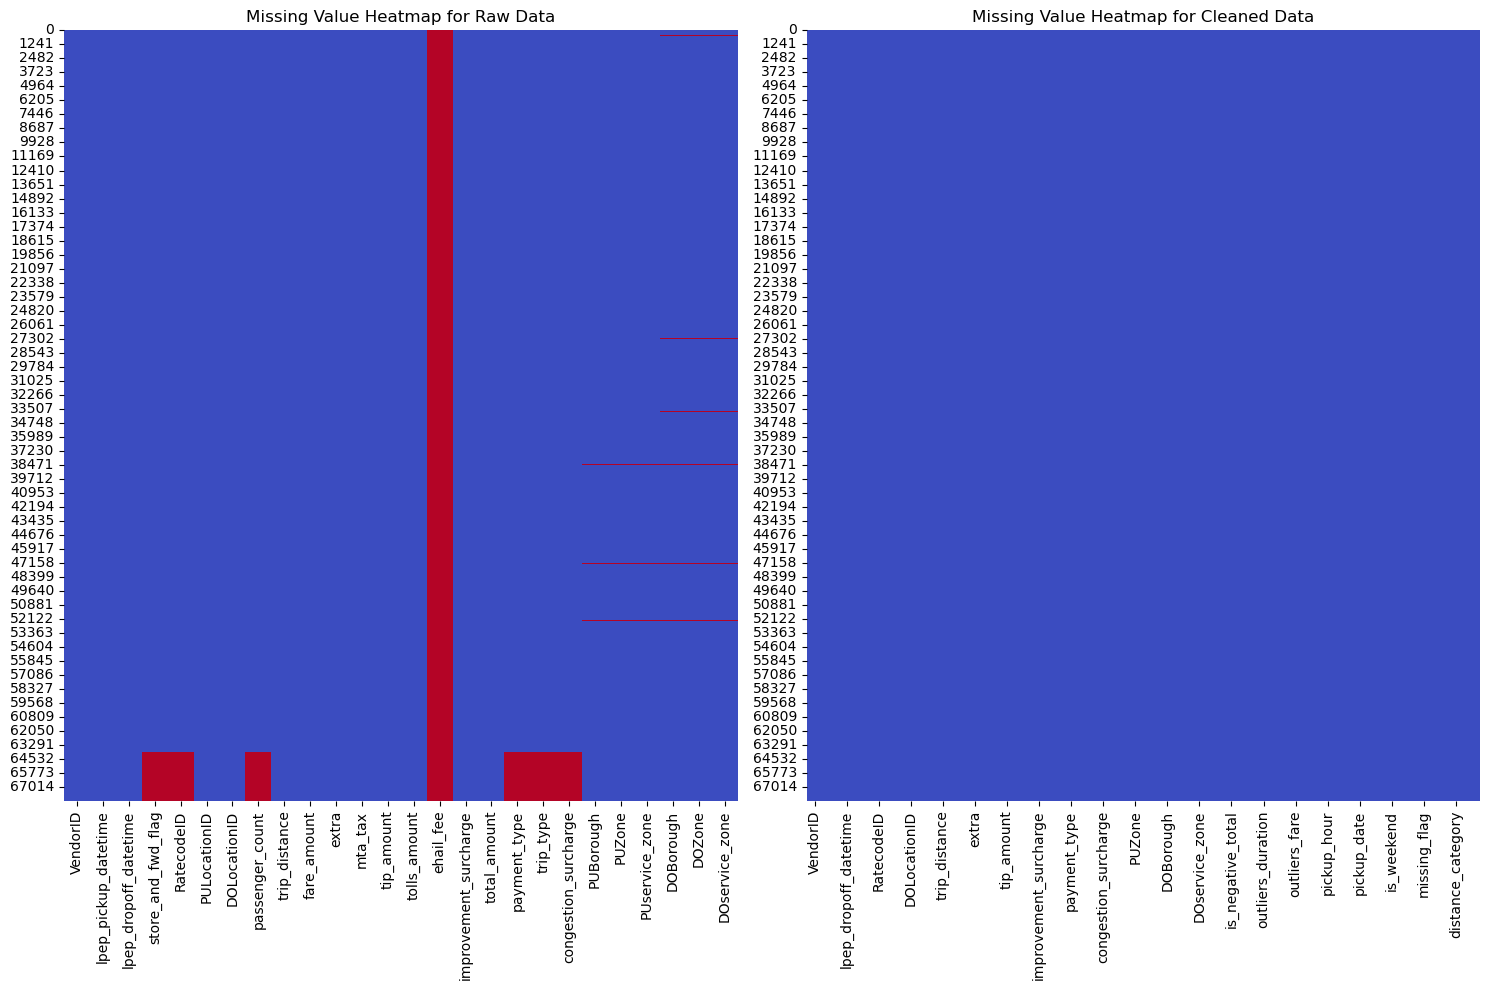

In [230]:
# Define the colormap
cmap = 'coolwarm'  
# Create the figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 10))

# Heatmap for missing values in raw data
sns.heatmap(df2.isna(), ax=axes[0], cmap=cmap, cbar=False)
axes[0].set_title('Missing Value Heatmap for Raw Data')

# Heatmap for missing values in cleaned data
sns.heatmap(df.isna(), ax=axes[1], cmap=cmap, cbar=False)
axes[1].set_title('Missing Value Heatmap for Cleaned Data')

# Adjust layout and display
plt.tight_layout()
plt.show()


Test 1: Difference in Average Fare by Payment Type
This test will check if payment type impacts the average fare amount.

In [172]:
from scipy import stats

# Filter dataset for valid payment types
data_filtered = df[df['payment_type'].isin([1, 2])]  

# Extract fare amounts by payment type
fare_credit = data_filtered[data_filtered['payment_type'] == 1]['fare_amount']
fare_cash = data_filtered[data_filtered['payment_type'] == 2]['fare_amount']

# Perform ANOVA
f_stat, p_value = stats.f_oneway(fare_credit, fare_cash)
print("ANOVA F-statistic:", f_stat)
print("ANOVA p-value:", p_value)

# Interpret the p-value
if p_value < 0.05:
    print("Reject the null hypothesis: Significant difference in average fare by payment type.")
else:
    print("Fail to reject the null hypothesis: No significant difference in average fare by payment type.")

ANOVA F-statistic: 174.81634715378382
ANOVA p-value: 7.359386818609046e-40
Reject the null hypothesis: Significant difference in average fare by payment type.


Test 2: Impact of Trip Distance on Tip Amount

In [173]:
# Use Pearson correlation test
correlation, p_value = stats.pearsonr(df['trip_distance'], df['tip_amount'])
print("Correlation coefficient:", correlation)
print("p-value:", p_value)

# Interpret the p-value
if p_value < 0.05:
    print("Reject the null hypothesis: Significant correlation between trip distance and tip amount.")
else:
    print("Fail to reject the null hypothesis: No significant correlation between trip distance and tip amount.")

Correlation coefficient: 0.003216151340618096
p-value: 0.40093271811946296
Fail to reject the null hypothesis: No significant correlation between trip distance and tip amount.


Test 3: Do High-Volume Zones Generate Higher Total Revenue?
This test will check if there’s a significant difference in total revenue for trips originating in high-demand zones versus low-demand zones.

In [174]:
# Define high-demand zones (top 10% by trip count)
top_zones = df['PULocationID'].value_counts().head(int(len(df) * 0.1)).index
df['is_high_demand'] = df['PULocationID'].apply(lambda x: 1 if x in top_zones else 0)

# Separate data into high-demand and low-demand zone trips
high_demand_fares = df[df['is_high_demand'] == 1]['total_amount']
low_demand_fares = df[df['is_high_demand'] == 0]['total_amount']

# Perform t-test
t_stat, p_value = stats.ttest_ind(high_demand_fares, low_demand_fares, equal_var=False)
print("t-statistic:", t_stat)
print("p-value:", p_value)

# Interpret the p-value
if p_value < 0.05:
    print("Reject the null hypothesis: High-demand zones have significantly different total revenue.")
else:
    print("Fail to reject the null hypothesis: No significant difference in total revenue between high and low-demand zones.")

t-statistic: nan
p-value: nan
Fail to reject the null hypothesis: No significant difference in total revenue between high and low-demand zones.


3. Statistical Inference and Confidence Intervals
For added robustness, calculate confidence intervals for mean fare or revenue in high-demand vs. low-demand zones.


In [175]:
# Calculate 95% confidence interval for high-demand zones
high_demand_mean = high_demand_fares.mean()
high_demand_std = high_demand_fares.std()
high_demand_n = len(high_demand_fares)
high_demand_conf_interval = stats.norm.interval(0.95, loc=high_demand_mean, scale=high_demand_std / np.sqrt(high_demand_n))

print("95% Confidence Interval for High-Demand Zone Revenue:", high_demand_conf_interval)

95% Confidence Interval for High-Demand Zone Revenue: (21.673379690258503, 21.905375056043408)
